#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> Final Project. Apple</span>

---

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from datetime import datetime, timedelta
import re
import pandas as pd
import time
from datetime import timezone

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Data Extraction</span>

In [2]:
# Parse relative date
def parse_relative_date(relative_str):
    now = datetime.now()
    relative_str = relative_str.strip().lower()

    traductions = {
        "segundo": "second",
        "minuto": "minute",
        "hora": "hour",
        "día": "day",
        "dias": "day",
        "semana": "week",
        "mes": "month",
        "año": "year",
        "semanas": "weeks",
        "meses": "months",
        "años": "years"
    }

    if "hace" in relative_str:
        match = re.match(r"hace\s+(\d+)\s+(\w+)", relative_str)
        if match:
            quantity = int(match.group(1))
            unit_es = match.group(2)
            unit_en = traductions.get(unit_es, "")
            relative_str = f"{quantity} {unit_en} ago"

    match = re.match(r"(\d+)\s+(second|minute|hour|day|week|month|year)s?\s+ago", relative_str)
    if not match:
        return relative_str 
    quantity = int(match.group(1))
    unit = match.group(2)
    days = {
        "second": 0, "minute": 0, "hour": 0,
        "day": 1, "week": 7, "month": 30, "year": 365
    }.get(unit, 0) * quantity
    return (now - timedelta(days=days)).strftime("%Y-%m-%d")

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 1.1 YouTube Comments</span>

In [4]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=qF4vZxbSmjo"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_iphone16e_MKBHD_youtube = pd.DataFrame(comments_data)
comments_iphone16e_MKBHD_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_iphone16e_MKBHD_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_iphone16e_MKBHD_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 60 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 100 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 120 comments
[Scroll 17] Loaded 120 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 140 comments
[Scroll 20] Loaded 140 comments
[Scroll 21] Loaded 140 comments
[Scroll 22] Loaded 160 comments
[Scroll 23] Loaded 160 comments
[Scroll 24] Loaded 160 comments
[Scroll 25] Loaded 180 comments
[Scroll 26] Loaded 180 comments
[Scroll 27] Loaded 180 comments
[Scroll 28] Loaded 200 comments
[Scroll 29] Loaded 200 comments
[Scroll 30] Loaded 200 comments
[Scroll 31] Loaded 220 comments
[Scroll 32] Loaded 220 commen

In [ ]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=rhI3fgw2pGE"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_iphone16e_iJustine_youtube = pd.DataFrame(comments_data)
comments_iphone16e_iJustine_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_iphone16e_iJustine_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_iphone16e_iJustine_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 60 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 80 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 100 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 100 comments
[Scroll 15] Loaded 120 comments
[Scroll 16] Loaded 120 comments
[Scroll 17] Loaded 120 comments
[Scroll 18] Loaded 140 comments
[Scroll 19] Loaded 140 comments
[Scroll 20] Loaded 140 comments
[Scroll 21] Loaded 160 comments
[Scroll 22] Loaded 160 comments
[Scroll 23] Loaded 160 comments
[Scroll 24] Loaded 180 comments
[Scroll 25] Loaded 180 comments
[Scroll 26] Loaded 180 comments
[Scroll 27] Loaded 200 comments
[Scroll 28] Loaded 200 comments
[Scroll 29] Loaded 200 comments
[Scroll 30] Loaded 220 comments
[Scroll 31] Loaded 220 comments
[Scroll 32] Loaded 220 comme

In [ ]:
comments_iphone16e_MKBHD_youtube.to_csv("data/raw/comments_iphone16e_MKBHD_youtube.csv", index=False)
comments_iphone16e_iJustine_youtube.to_csv("data/raw/comments_iphone16e_iJustine_youtube.csv", index=False)

In [ ]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=f3DfJxvkN-8"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_airpodspro2_MKBHD_youtube = pd.DataFrame(comments_data)
comments_airpodspro2_MKBHD_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_airpodspro2_MKBHD_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_airpodspro2_MKBHD_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 20 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 40 comments
[Scroll 7] Loaded 40 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 60 comments
[Scroll 11] Loaded 60 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 80 comments
[Scroll 14] Loaded 80 comments
[Scroll 15] Loaded 80 comments
[Scroll 16] Loaded 100 comments
[Scroll 17] Loaded 100 comments
[Scroll 18] Loaded 100 comments
[Scroll 19] Loaded 120 comments
[Scroll 20] Loaded 120 comments
[Scroll 21] Loaded 120 comments
[Scroll 22] Loaded 120 comments
[Scroll 23] Loaded 140 comments
[Scroll 24] Loaded 140 comments
[Scroll 25] Loaded 140 comments
[Scroll 26] Loaded 140 comments
[Scroll 27] Loaded 160 comments
[Scroll 28] Loaded 160 comments
[Scroll 29] Loaded 160 comments
[Scroll 30] Loaded 160 comments
[Scroll 31] Loaded 180 comments
[Scroll 32] Loaded 180 comments


In [ ]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=VixPhOj2DG8"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_airpodspro2_iJustine_youtube = pd.DataFrame(comments_data)
comments_airpodspro2_iJustine_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_airpodspro2_iJustine_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_airpodspro2_iJustine_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 60 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 80 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 100 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 120 comments
[Scroll 17] Loaded 120 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 140 comments
[Scroll 20] Loaded 140 comments
[Scroll 21] Loaded 140 comments
[Scroll 22] Loaded 160 comments
[Scroll 23] Loaded 160 comments
[Scroll 24] Loaded 160 comments
[Scroll 25] Loaded 180 comments
[Scroll 26] Loaded 180 comments
[Scroll 27] Loaded 180 comments
[Scroll 28] Loaded 200 comments
[Scroll 29] Loaded 200 comments
[Scroll 30] Loaded 200 comments
[Scroll 31] Loaded 220 comments
[Scroll 32] Loaded 220 commen

In [ ]:
comments_airpodspro2_MKBHD_youtube.to_csv("data/raw/comments_airpodspro2_MKBHD_youtube.csv", index=False)
comments_airpodspro2_iJustine_youtube.to_csv("data/raw/comments_airpodspro2_iJustine_youtube.csv", index=False)

In [76]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=hv8RzUWZGAQ"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_WF1000XM5_Gamesky_youtube = pd.DataFrame(comments_data)
comments_WF1000XM5_Gamesky_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_WF1000XM5_Gamesky_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_WF1000XM5_Gamesky_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 20 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 40 comments
[Scroll 7] Loaded 40 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 60 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 80 comments
[Scroll 14] Loaded 80 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 100 comments
[Scroll 17] Loaded 100 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 120 comments
[Scroll 20] Loaded 120 comments
[Scroll 21] Loaded 140 comments
[Scroll 22] Loaded 140 comments
[Scroll 23] Loaded 140 comments
[Scroll 24] Loaded 160 comments
[Scroll 25] Loaded 160 comments
[Scroll 26] Loaded 160 comments
[Scroll 27] Loaded 180 comments
[Scroll 28] Loaded 180 comments
[Scroll 29] Loaded 180 comments
[Scroll 30] Loaded 200 comments
[Scroll 31] Loaded 200 comments
[Scroll 32] Loaded 200 comments

In [78]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=tn5WPaQhv_U"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_WF1000XM5_DigitalTrends_youtube = pd.DataFrame(comments_data)
comments_WF1000XM5_DigitalTrends_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_WF1000XM5_DigitalTrends_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_WF1000XM5_DigitalTrends_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 20 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 40 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 100 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 120 comments
[Scroll 17] Loaded 120 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 140 comments
[Scroll 20] Loaded 140 comments
[Scroll 21] Loaded 140 comments
[Scroll 22] Loaded 160 comments
[Scroll 23] Loaded 160 comments
[Scroll 24] Loaded 160 comments
[Scroll 25] Loaded 180 comments
[Scroll 26] Loaded 180 comments
[Scroll 27] Loaded 180 comments
[Scroll 28] Loaded 200 comments
[Scroll 29] Loaded 200 comments
[Scroll 30] Loaded 200 comments
[Scroll 31] Loaded 218 comments
[Scroll 32] Loaded 218 commen

In [ ]:
comments_WF1000XM5_Gamesky_youtube.to_csv("data/raw/comments_WF-1000XM5_Gamesky_youtube.csv", index=False)
comments_WF1000XM5_DigitalTrends_youtube.to_csv("data/raw/comments_WF-1000XM5_DigitalTrends_youtube.csv", index=False)

In [83]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=1qQ4a6Kzra4"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_BoseQC2_6MonthsLater_youtube = pd.DataFrame(comments_data)
comments_BoseQC2_6MonthsLater_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_BoseQC2_6MonthsLater_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_BoseQC2_6MonthsLater_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 20 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 40 comments
[Scroll 7] Loaded 40 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 60 comments
[Scroll 11] Loaded 60 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 80 comments
[Scroll 14] Loaded 80 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 100 comments
[Scroll 17] Loaded 100 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 120 comments
[Scroll 20] Loaded 120 comments
[Scroll 21] Loaded 140 comments
[Scroll 22] Loaded 140 comments
[Scroll 23] Loaded 140 comments
[Scroll 24] Loaded 160 comments
[Scroll 25] Loaded 160 comments
[Scroll 26] Loaded 160 comments
[Scroll 27] Loaded 160 comments
[Scroll 28] Loaded 180 comments
[Scroll 29] Loaded 180 comments
[Scroll 30] Loaded 180 comments
[Scroll 31] Loaded 200 comments
[Scroll 32] Loaded 200 comments

In [84]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=Jqn6xt_YP_c"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_BoseQC2_CEONTHEMAKING_youtube = pd.DataFrame(comments_data)
comments_BoseQC2_CEONTHEMAKING_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_BoseQC2_CEONTHEMAKING_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_BoseQC2_CEONTHEMAKING_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 20 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 40 comments
[Scroll 7] Loaded 40 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 60 comments
[Scroll 11] Loaded 60 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 80 comments
[Scroll 14] Loaded 80 comments
[Scroll 15] Loaded 80 comments
[Scroll 16] Loaded 100 comments
[Scroll 17] Loaded 100 comments
[Scroll 18] Loaded 100 comments
[Scroll 19] Loaded 100 comments
[Scroll 20] Loaded 120 comments
[Scroll 21] Loaded 120 comments
[Scroll 22] Loaded 120 comments
[Scroll 23] Loaded 120 comments
[Scroll 24] Loaded 140 comments
[Scroll 25] Loaded 140 comments
[Scroll 26] Loaded 140 comments
[Scroll 27] Loaded 140 comments
[Scroll 28] Loaded 160 comments
[Scroll 29] Loaded 160 comments
[Scroll 30] Loaded 160 comments
[Scroll 31] Loaded 160 comments
[Scroll 32] Loaded 160 comments


In [85]:
comments_BoseQC2_6MonthsLater_youtube.to_csv("data/raw/comments_BoseQC2_6MonthsLater_youtube.csv", index=False)
comments_BoseQC2_CEONTHEMAKING_youtube.to_csv("data/raw/comments_BoseQC2_CEONTHEMAKING_youtube.csv", index=False)

In [18]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=86Gy035z_KA"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_visionpro_MKBHD_youtube = pd.DataFrame(comments_data)
comments_visionpro_MKBHD_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_visionpro_MKBHD_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_visionpro_MKBHD_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 40 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 100 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 100 comments
[Scroll 17] Loaded 120 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 120 comments
[Scroll 20] Loaded 120 comments
[Scroll 21] Loaded 140 comments
[Scroll 22] Loaded 140 comments
[Scroll 23] Loaded 140 comments
[Scroll 24] Loaded 140 comments
[Scroll 25] Loaded 160 comments
[Scroll 26] Loaded 160 comments
[Scroll 27] Loaded 160 comments
[Scroll 28] Loaded 160 comments
[Scroll 29] Loaded 180 comments
[Scroll 30] Loaded 180 comments
[Scroll 31] Loaded 180 comments
[Scroll 32] Loaded 180 commen

In [19]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=CaWt6-xe29k"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_visionpro_iJustine_youtube = pd.DataFrame(comments_data)
comments_visionpro_iJustine_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_visionpro_iJustine_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_visionpro_iJustine_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 60 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 80 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 100 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 100 comments
[Scroll 15] Loaded 120 comments
[Scroll 16] Loaded 120 comments
[Scroll 17] Loaded 120 comments
[Scroll 18] Loaded 140 comments
[Scroll 19] Loaded 140 comments
[Scroll 20] Loaded 140 comments
[Scroll 21] Loaded 160 comments
[Scroll 22] Loaded 160 comments
[Scroll 23] Loaded 160 comments
[Scroll 24] Loaded 180 comments
[Scroll 25] Loaded 180 comments
[Scroll 26] Loaded 180 comments
[Scroll 27] Loaded 200 comments
[Scroll 28] Loaded 200 comments
[Scroll 29] Loaded 200 comments
[Scroll 30] Loaded 220 comments
[Scroll 31] Loaded 220 comments
[Scroll 32] Loaded 220 comme

In [20]:
comments_visionpro_MKBHD_youtube.to_csv("data/raw/comments_visionpro_MKBHD_youtube.csv", index=False)
comments_visionpro_iJustine_youtube.to_csv("data/raw/comments_visionpro_iJustine_youtube.csv", index=False)

In [87]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=aNTBGLqVJmk"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_metaquest3_6MonthsLater_youtube = pd.DataFrame(comments_data)
comments_metaquest3_6MonthsLater_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_metaquest3_6MonthsLater_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_metaquest3_6MonthsLater_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 20 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 40 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 80 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 100 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 120 comments
[Scroll 17] Loaded 120 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 140 comments
[Scroll 20] Loaded 140 comments
[Scroll 21] Loaded 140 comments
[Scroll 22] Loaded 160 comments
[Scroll 23] Loaded 160 comments
[Scroll 24] Loaded 160 comments
[Scroll 25] Loaded 180 comments
[Scroll 26] Loaded 180 comments
[Scroll 27] Loaded 180 comments
[Scroll 28] Loaded 180 comments
[Scroll 29] Loaded 200 comments
[Scroll 30] Loaded 200 comments
[Scroll 31] Loaded 200 comments
[Scroll 32] Loaded 220 commen

In [88]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=CyBcAm4mI6w"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_metaquest3_LinuxTechTips_youtube = pd.DataFrame(comments_data)
comments_metaquest3_LinuxTechTips_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_metaquest3_LinuxTechTips_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_metaquest3_LinuxTechTips_youtube)}")

[Scroll 1] Loaded 20 comments
[Scroll 2] Loaded 20 comments
[Scroll 3] Loaded 20 comments
[Scroll 4] Loaded 40 comments
[Scroll 5] Loaded 40 comments
[Scroll 6] Loaded 40 comments
[Scroll 7] Loaded 40 comments
[Scroll 8] Loaded 60 comments
[Scroll 9] Loaded 60 comments
[Scroll 10] Loaded 60 comments
[Scroll 11] Loaded 60 comments
[Scroll 12] Loaded 80 comments
[Scroll 13] Loaded 80 comments
[Scroll 14] Loaded 80 comments
[Scroll 15] Loaded 100 comments
[Scroll 16] Loaded 100 comments
[Scroll 17] Loaded 100 comments
[Scroll 18] Loaded 120 comments
[Scroll 19] Loaded 120 comments
[Scroll 20] Loaded 120 comments
[Scroll 21] Loaded 120 comments
[Scroll 22] Loaded 140 comments
[Scroll 23] Loaded 140 comments
[Scroll 24] Loaded 140 comments
[Scroll 25] Loaded 140 comments
[Scroll 26] Loaded 160 comments
[Scroll 27] Loaded 160 comments
[Scroll 28] Loaded 160 comments
[Scroll 29] Loaded 160 comments
[Scroll 30] Loaded 180 comments
[Scroll 31] Loaded 180 comments
[Scroll 32] Loaded 180 comments

In [89]:
comments_metaquest3_6MonthsLater_youtube.to_csv("data/raw/comments_metaquest3_6MonthsLater_youtube.csv", index=False)
comments_metaquest3_LinuxTechTips_youtube.to_csv("data/raw/comments_metaquest3_LinuxTechTips_youtube.csv", index=False)

In [108]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=5lMVE-OXqcA"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_HTCVive_ShortCircuit_youtube = pd.DataFrame(comments_data)
comments_HTCVive_ShortCircuit_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_HTCVive_ShortCircuit_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_HTCVive_ShortCircuit_youtube)}")

[Scroll 1] Loaded 120 comments
[Scroll 2] Loaded 140 comments
[Scroll 3] Loaded 180 comments
[Scroll 4] Loaded 220 comments
[Scroll 5] Loaded 220 comments
[Scroll 6] Loaded 240 comments
[Scroll 7] Loaded 300 comments
[Scroll 8] Loaded 320 comments
[Scroll 9] Loaded 340 comments
[Scroll 10] Loaded 340 comments
[Scroll 11] Loaded 340 comments
[Scroll 12] Loaded 380 comments
[Scroll 13] Loaded 440 comments
[Scroll 14] Loaded 440 comments
[Scroll 15] Loaded 440 comments
[Scroll 16] Loaded 440 comments
[Scroll 17] Loaded 440 comments
[Scroll 18] Loaded 440 comments
[Scroll 19] Loaded 440 comments
[Scroll 20] Loaded 440 comments
[Scroll 21] Loaded 440 comments
[Scroll 22] Loaded 440 comments
[Scroll 23] Loaded 440 comments
No new comments for 10 iterations. Stopping scroll.
Final unique comments: 440


In [104]:
options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

url = "https://www.youtube.com/watch?v=7XY_KFLkAYQ"
driver.get(url)
time.sleep(5)

# Scroll to Comments
comments_section = driver.find_element(By.TAG_NAME, 'ytd-comments')
driver.execute_script("arguments[0].scrollIntoView();", comments_section)
time.sleep(5)

# Scroll to load more comments
prev_count = 0
same_count_counter = 0

for i in range(150):  # more aggressive scroll attempts
    driver.execute_script("window.scrollBy(0, window.innerHeight);")
    time.sleep(3)

    current_comments = driver.find_elements(By.CSS_SELECTOR, "#content-text")
    if len(current_comments) == prev_count:
        same_count_counter += 1
    else:
        same_count_counter = 0  # reset if new comments are found

    prev_count = len(current_comments)
    print(f"[Scroll {i+1}] Loaded {prev_count} comments")

    if same_count_counter >= 10:
        print("No new comments for 10 iterations. Stopping scroll.")
        break

# Extract comments
comment_elements = driver.find_elements(By.CSS_SELECTOR, "ytd-comment-thread-renderer")
comments_data = []

for elem in comment_elements:
    try:
        text = elem.find_element(By.CSS_SELECTOR, "#content-text").text.strip()
        date_str = elem.find_element(By.CSS_SELECTOR, "#published-time-text a").text.strip()
        parsed_date = parse_relative_date(date_str)
        comments_data.append({
            "date": parsed_date,
            "text": text
        })
    except Exception as e:
        print("Skipping a comment due to error:", e)

driver.quit()

comments_HTCVive_JayzTwoCents_youtube = pd.DataFrame(comments_data)
comments_HTCVive_JayzTwoCents_youtube.drop_duplicates(subset=["text"], inplace=True)
comments_HTCVive_JayzTwoCents_youtube.reset_index(drop=True, inplace=True)
print(f"Final unique comments: {len(comments_HTCVive_JayzTwoCents_youtube)}")

[Scroll 1] Loaded 40 comments
[Scroll 2] Loaded 40 comments
[Scroll 3] Loaded 40 comments
[Scroll 4] Loaded 60 comments
[Scroll 5] Loaded 60 comments
[Scroll 6] Loaded 60 comments
[Scroll 7] Loaded 60 comments
[Scroll 8] Loaded 80 comments
[Scroll 9] Loaded 80 comments
[Scroll 10] Loaded 80 comments
[Scroll 11] Loaded 100 comments
[Scroll 12] Loaded 100 comments
[Scroll 13] Loaded 100 comments
[Scroll 14] Loaded 120 comments
[Scroll 15] Loaded 120 comments
[Scroll 16] Loaded 120 comments
[Scroll 17] Loaded 140 comments
[Scroll 18] Loaded 140 comments
[Scroll 19] Loaded 140 comments
[Scroll 20] Loaded 140 comments
[Scroll 21] Loaded 160 comments
[Scroll 22] Loaded 160 comments
[Scroll 23] Loaded 160 comments
[Scroll 24] Loaded 160 comments
[Scroll 25] Loaded 180 comments
[Scroll 26] Loaded 180 comments
[Scroll 27] Loaded 180 comments
[Scroll 28] Loaded 200 comments
[Scroll 29] Loaded 200 comments
[Scroll 30] Loaded 200 comments
[Scroll 31] Loaded 220 comments
[Scroll 32] Loaded 220 comm

In [109]:
comments_HTCVive_ShortCircuit_youtube.to_csv("data/raw/comments_HTCVive_ShortCircuit_youtube.csv", index=False)
comments_HTCVive_JayzTwoCents_youtube.to_csv("data/raw/comments_HTCVive_JayzTwoCents_youtube.csv", index=False)

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 1.2 Reddit Reviews</span>

In [3]:
import os

current_dir = os.getcwd()
client_id_path = os.path.join(current_dir, "data/api_secrets/client_id.txt")
client_secret_path = os.path.join(current_dir, "data/api_secrets/client_secret.txt")

with open(client_id_path, "r") as file:
    CLIENT_ID = file.read().strip()
with open(client_secret_path, "r") as file:
    CLIENT_SECRET = file.read().strip()

In [4]:
import praw
import pandas as pd
from datetime import datetime

# Fill in with your Reddit app credentials
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent="Apple Comments/0.1"
)

reddit_urls = [
    "https://www.reddit.com/r/LinusTechTips/comments/1itc5n3/thoughts_on_the_iphone_16e/",
    "https://www.reddit.com/r/iphone/comments/1j5f9ni/my_experience_with_the_new_iphone_16e_so_far_what/",
    "https://www.reddit.com/r/iphone/comments/1izpzkv/iphone_16e_review_eh_its_alright/",
    "https://www.reddit.com/r/ios/comments/1itt74w/the_iphone_16e_isnt_a_bad_phone_its_a_bad_value/",
    "https://www.reddit.com/r/iphone/comments/1ix5e5p/why_you_should_buy_the_16e/"
]

all_comments = []

for url in reddit_urls:
    try:
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=None)  # 💥 THIS gets ALL comments
        for comment in submission.comments.list():
            date = datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d')
            text = comment.body.strip()
            if text:
                all_comments.append({"date": date, "text": text})
        print(f"Extracted {len(submission.comments.list())} comments from: {url}")
    except Exception as e:
        print(f"Failed to extract from {url}: {e}")

combined_df = pd.DataFrame(all_comments)
combined_df.drop_duplicates(subset=["text"], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print(combined_df.head())
print(f"Total unique Reddit comments: {len(combined_df)}")

combined_df.to_csv("data/raw/comments_iphone16e_reddit.csv", index=False)

Extracted 205 comments from: https://www.reddit.com/r/LinusTechTips/comments/1itc5n3/thoughts_on_the_iphone_16e/
Extracted 132 comments from: https://www.reddit.com/r/iphone/comments/1j5f9ni/my_experience_with_the_new_iphone_16e_so_far_what/
Extracted 68 comments from: https://www.reddit.com/r/iphone/comments/1izpzkv/iphone_16e_review_eh_its_alright/
Extracted 157 comments from: https://www.reddit.com/r/ios/comments/1itt74w/the_iphone_16e_isnt_a_bad_phone_its_a_bad_value/
Extracted 100 comments from: https://www.reddit.com/r/iphone/comments/1ix5e5p/why_you_should_buy_the_16e/
         date                                               text
0  2025-02-19  Dissapointing. \n\n  \nIf it had magsafe and w...
1  2025-02-19  A bit disappointed that it doesn’t support Qi2...
2  2025-02-19  Why did I feel the whole show was just telling...
3  2025-02-19       $599 or €719 in Europe is way too expensive.
4  2025-02-19  Same as all recent tech: too expensive when th...
Total unique Reddit comment

In [81]:
reddit_urls = [
    "https://www.reddit.com/r/AirpodsPro/comments/1gvjh7g/airpods_pro_2_longterm_review/",
    "https://www.reddit.com/r/airpods/comments/1h2rx1a/are_airpods_pro_2_worth_the_money/",
    "https://www.reddit.com/r/airpods/comments/1ckty46/airpods_pro_gen_2_really_worth_it/",
    "https://www.reddit.com/r/airpods/comments/1g05jha/are_the_apple_airpods_pro_2_worth_buying_right/",
    "https://www.reddit.com/r/airpods/comments/1fui4eo/upgraded_to_airpods_pro_2_and_the_first_thing_i/",
    "https://www.reddit.com/r/airpods/comments/18mcj95/i_love_my_airpods_pro_2_so_much_holy_shit/"
]

all_comments = []

for url in reddit_urls:
    try:
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=None)  # 💥 THIS gets ALL comments
        for comment in submission.comments.list():
            date = datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d')
            text = comment.body.strip()
            if text:
                all_comments.append({"date": date, "text": text})
        print(f"Extracted {len(submission.comments.list())} comments from: {url}")
    except Exception as e:
        print(f"Failed to extract from {url}: {e}")

combined_df = pd.DataFrame(all_comments)
combined_df.drop_duplicates(subset=["text"], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print(combined_df.head())
print(f"Total unique Reddit comments: {len(combined_df)}")

combined_df.to_csv("data/raw/comments_airpodspro2_reddit.csv", index=False)

Extracted 185 comments from: https://www.reddit.com/r/AirpodsPro/comments/1gvjh7g/airpods_pro_2_longterm_review/
Extracted 171 comments from: https://www.reddit.com/r/airpods/comments/1h2rx1a/are_airpods_pro_2_worth_the_money/
Extracted 151 comments from: https://www.reddit.com/r/airpods/comments/1ckty46/airpods_pro_gen_2_really_worth_it/
Extracted 84 comments from: https://www.reddit.com/r/airpods/comments/1g05jha/are_the_apple_airpods_pro_2_worth_buying_right/
Extracted 171 comments from: https://www.reddit.com/r/airpods/comments/1fui4eo/upgraded_to_airpods_pro_2_and_the_first_thing_i/
Extracted 238 comments from: https://www.reddit.com/r/airpods/comments/18mcj95/i_love_my_airpods_pro_2_so_much_holy_shit/
         date                                               text
0  2024-11-20  No, I’m skipping because this is legitimately ...
1  2024-11-20       Any chance you can expand on your thoughts 😒
2  2025-02-05  A bit long lol but anyway, thanks to this post...
3  2024-11-20  I would 

In [82]:
reddit_urls = [
    "https://www.reddit.com/r/headphones/comments/1dhu922/the_sony_wf1000xm5_are_mediocre_at_their_price/",
    "https://www.reddit.com/r/SonyHeadphones/comments/172kk5j/peoples_experience_with_the_wf1000xm5/",
    "https://www.reddit.com/r/SonyHeadphones/comments/1gmiri0/are_the_wf1000xm5s_worth_it/",
    "https://www.reddit.com/r/SonyHeadphones/comments/1eno51v/wf1000xm5_worth_it_in_2024/",
    "https://www.reddit.com/r/SonyHeadphones/comments/1brgehu/wf1000xm5_are_they_worth_it/",
    "https://www.reddit.com/r/headphones/comments/15caozj/sony_wf1000xm5_early_impressions_review/",
    "https://www.reddit.com/r/SonyHeadphones/comments/1bagx62/should_i_buy_sony_wf1000xm5/",
]

all_comments = []

for url in reddit_urls:
    try:
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=None)  # 💥 THIS gets ALL comments
        for comment in submission.comments.list():
            date = datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d')
            text = comment.body.strip()
            if text:
                all_comments.append({"date": date, "text": text})
        print(f"Extracted {len(submission.comments.list())} comments from: {url}")
    except Exception as e:
        print(f"Failed to extract from {url}: {e}")

combined_df = pd.DataFrame(all_comments)
combined_df.drop_duplicates(subset=["text"], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print(combined_df.head())
print(f"Total unique Reddit comments: {len(combined_df)}")

combined_df.to_csv("data/raw/comments_WF-1000XM5_reddit.csv", index=False)

Extracted 69 comments from: https://www.reddit.com/r/headphones/comments/1dhu922/the_sony_wf1000xm5_are_mediocre_at_their_price/
Extracted 120 comments from: https://www.reddit.com/r/SonyHeadphones/comments/172kk5j/peoples_experience_with_the_wf1000xm5/
Extracted 120 comments from: https://www.reddit.com/r/SonyHeadphones/comments/1gmiri0/are_the_wf1000xm5s_worth_it/
Extracted 54 comments from: https://www.reddit.com/r/SonyHeadphones/comments/1eno51v/wf1000xm5_worth_it_in_2024/
Extracted 28 comments from: https://www.reddit.com/r/SonyHeadphones/comments/1brgehu/wf1000xm5_are_they_worth_it/
Extracted 55 comments from: https://www.reddit.com/r/headphones/comments/15caozj/sony_wf1000xm5_early_impressions_review/
Extracted 24 comments from: https://www.reddit.com/r/SonyHeadphones/comments/1bagx62/should_i_buy_sony_wf1000xm5/
         date                                               text
0  2024-06-17  The same could have been said for every pair o...
1  2024-06-17  I can’t speak to the XM

In [86]:
reddit_urls = [
    "https://www.reddit.com/r/bose/comments/160x2xv/are_bose_quietcomfort_ii_earbuds_worth_it_in_2023/",
    "https://www.reddit.com/r/bose/comments/186ytis/quietcomfort_earbuds_ii_are_garbage/",
    "https://www.reddit.com/r/bose/comments/yyo4mn/my_indepth_review_on_qc_earbuds_2/",
    "https://www.reddit.com/r/bose/comments/1eubzyz/bose_quietcomfort_2_earbuds_are_not_worth_the/",
    "https://www.reddit.com/r/bose/comments/18kksjg/qc_earbuds_2_a_disaster/",
    "https://www.reddit.com/r/bose/comments/1c8rvfk/bose_qc_ii_earbuds_are_horrible/"
]

all_comments = []

for url in reddit_urls:
    try:
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=None)  # 💥 THIS gets ALL comments
        for comment in submission.comments.list():
            date = datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d')
            text = comment.body.strip()
            if text:
                all_comments.append({"date": date, "text": text})
        print(f"Extracted {len(submission.comments.list())} comments from: {url}")
    except Exception as e:
        print(f"Failed to extract from {url}: {e}")

combined_df = pd.DataFrame(all_comments)
combined_df.drop_duplicates(subset=["text"], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print(combined_df.head())
print(f"Total unique Reddit comments: {len(combined_df)}")

combined_df.to_csv("data/raw/comments_BoseQC2_reddit.csv", index=False)

Extracted 106 comments from: https://www.reddit.com/r/bose/comments/160x2xv/are_bose_quietcomfort_ii_earbuds_worth_it_in_2023/
Extracted 87 comments from: https://www.reddit.com/r/bose/comments/186ytis/quietcomfort_earbuds_ii_are_garbage/
Extracted 28 comments from: https://www.reddit.com/r/bose/comments/yyo4mn/my_indepth_review_on_qc_earbuds_2/
Extracted 31 comments from: https://www.reddit.com/r/bose/comments/1eubzyz/bose_quietcomfort_2_earbuds_are_not_worth_the/
Extracted 53 comments from: https://www.reddit.com/r/bose/comments/18kksjg/qc_earbuds_2_a_disaster/
Extracted 48 comments from: https://www.reddit.com/r/bose/comments/1c8rvfk/bose_qc_ii_earbuds_are_horrible/
         date                                               text
0  2025-01-29                                          [removed]
1  2023-08-25  Bose earbuds ultra are rumored to launch in th...
2  2023-08-25  I’d wouldn’t buy them again, or Bose tbh. I wa...
3  2023-08-25  They sound great. The app is terrible, it does.

In [8]:
reddit_urls = [
    "https://www.reddit.com/r/VisionPro/comments/1ahvgth/average_persons_review_of_the_vision_pro/",
    "https://www.reddit.com/r/VisionPro/comments/1cq670r/over_60_days_with_apple_vision_pro_reflections/",
    "https://www.reddit.com/r/VisionPro/comments/1ah5mz7/just_got_my_apple_vision_pro_megathread/",
    "https://www.reddit.com/r/apple/comments/1fr3syw/apple_vision_pro_owners_how_many_of_you_still/",
    "https://www.reddit.com/r/macbookpro/comments/1e7u7hw/do_not_buy_the_base_m3_mbp/",
    "https://www.reddit.com/r/apple/comments/1ivpgu8/apple_vision_pro_postmortem_what_happened/"
]

all_comments = []

for url in reddit_urls:
    try:
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=None)  # 💥 THIS gets ALL comments
        for comment in submission.comments.list():
            date = datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d')
            text = comment.body.strip()
            if text:
                all_comments.append({"date": date, "text": text})
        print(f"Extracted {len(submission.comments.list())} comments from: {url}")
    except Exception as e:
        print(f"Failed to extract from {url}: {e}")

# Save to DataFrame
combined_df = pd.DataFrame(all_comments)
combined_df.drop_duplicates(subset=["text"], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print(combined_df.head())
print(f"Total unique Reddit comments: {len(combined_df)}")

combined_df.to_csv("data/raw/comments_visionpro_reddit.csv", index=False)

Extracted 147 comments from: https://www.reddit.com/r/VisionPro/comments/1ahvgth/average_persons_review_of_the_vision_pro/
Extracted 72 comments from: https://www.reddit.com/r/VisionPro/comments/1cq670r/over_60_days_with_apple_vision_pro_reflections/
Extracted 443 comments from: https://www.reddit.com/r/VisionPro/comments/1ah5mz7/just_got_my_apple_vision_pro_megathread/
Extracted 589 comments from: https://www.reddit.com/r/apple/comments/1fr3syw/apple_vision_pro_owners_how_many_of_you_still/
Extracted 686 comments from: https://www.reddit.com/r/macbookpro/comments/1e7u7hw/do_not_buy_the_base_m3_mbp/
Extracted 518 comments from: https://www.reddit.com/r/apple/comments/1ivpgu8/apple_vision_pro_postmortem_what_happened/
         date                                               text
0  2024-02-03                                          [deleted]
1  2024-02-03  >Finally, I can't drink tea with this on. I'm ...
2  2024-02-03  This is the kind of review I've been waiting f...
3  2024-02-03

In [90]:
reddit_urls = [
    "https://www.reddit.com/r/OculusQuest/comments/1ajh81x/what_do_people_use_the_meta_quest_3_for/",
    "https://www.reddit.com/r/oculus/comments/1cyk7y0/first_vr_quest_3_honest_review_pros_cons_tips_and/",
    "https://www.reddit.com/r/virtualreality/comments/1gfhkyu/meta_quest_3_i_tried_so_hard_to_be_impressed/",
    "https://www.reddit.com/r/MetaQuestVR/comments/1gi2x53/considering_getting_a_meta_quest_3/"
]

all_comments = []

for url in reddit_urls:
    try:
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=None)  # 💥 THIS gets ALL comments
        for comment in submission.comments.list():
            date = datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d')
            text = comment.body.strip()
            if text:
                all_comments.append({"date": date, "text": text})
        print(f"Extracted {len(submission.comments.list())} comments from: {url}")
    except Exception as e:
        print(f"Failed to extract from {url}: {e}")

# Save to DataFrame
combined_df = pd.DataFrame(all_comments)
combined_df.drop_duplicates(subset=["text"], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print(combined_df.head())
print(f"Total unique Reddit comments: {len(combined_df)}")

combined_df.to_csv("data/raw/comments_metaquest3_reddit.csv", index=False)

Extracted 565 comments from: https://www.reddit.com/r/OculusQuest/comments/1ajh81x/what_do_people_use_the_meta_quest_3_for/
Extracted 23 comments from: https://www.reddit.com/r/oculus/comments/1cyk7y0/first_vr_quest_3_honest_review_pros_cons_tips_and/
Extracted 34 comments from: https://www.reddit.com/r/virtualreality/comments/1gfhkyu/meta_quest_3_i_tried_so_hard_to_be_impressed/
Extracted 57 comments from: https://www.reddit.com/r/MetaQuestVR/comments/1gi2x53/considering_getting_a_meta_quest_3/
         date                                               text
0  2024-02-05  Thank you for your submission to r/oculusquest...
1  2024-02-05  Gaming.\n\nExploring 3d Videos.\n\nSideloading...
2  2024-02-05  I use mine mostly for exercise. I spend at lea...
3  2024-02-05  Huge amount of work: lots of screens in variou...
4  2024-02-05  Gaming!\n\nWalkabout Minigolf and 11 Table Ten...
Total unique Reddit comments: 668


In [93]:
reddit_urls = [
    "https://www.reddit.com/r/hoggit/comments/12daye8/my_vive_xr_elite_review_long/",
    "https://www.reddit.com/r/virtualreality/comments/11rr4i8/vive_xr_elite_first_impression_from_a_long_time/",
    "https://www.reddit.com/r/virtualreality/comments/12a15jj/who_is_keeping_the_vive_xr_elite/",
    "https://www.reddit.com/r/Vive/comments/125vuwg/my_comprehensive_vive_xr_elite_thoughts/",
    "https://www.reddit.com/r/Vive/comments/1dky7bl/the_vive_xr_elite_is_a_complete_waste_of_money/",
    "https://www.reddit.com/r/virtualreality/comments/11ndhby/vive_xr_elite_day_one_review/",
    "https://www.reddit.com/r/virtualreality/comments/16zzekn/xr_elite_some_thoughts_300_hours_later/"
]

all_comments = []

for url in reddit_urls:
    try:
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=None)  # 💥 THIS gets ALL comments
        for comment in submission.comments.list():
            date = datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d')
            text = comment.body.strip()
            if text:
                all_comments.append({"date": date, "text": text})
        print(f"Extracted {len(submission.comments.list())} comments from: {url}")
    except Exception as e:
        print(f"Failed to extract from {url}: {e}")

# Save to DataFrame
combined_df = pd.DataFrame(all_comments)
combined_df.drop_duplicates(subset=["text"], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

print(combined_df.head())
print(f"Total unique Reddit comments: {len(combined_df)}")

combined_df.to_csv("data/raw/comments_HTCVive_reddit.csv", index=False)

Extracted 38 comments from: https://www.reddit.com/r/hoggit/comments/12daye8/my_vive_xr_elite_review_long/
Extracted 102 comments from: https://www.reddit.com/r/virtualreality/comments/11rr4i8/vive_xr_elite_first_impression_from_a_long_time/
Extracted 44 comments from: https://www.reddit.com/r/virtualreality/comments/12a15jj/who_is_keeping_the_vive_xr_elite/
Extracted 33 comments from: https://www.reddit.com/r/Vive/comments/125vuwg/my_comprehensive_vive_xr_elite_thoughts/
Extracted 19 comments from: https://www.reddit.com/r/Vive/comments/1dky7bl/the_vive_xr_elite_is_a_complete_waste_of_money/
Extracted 137 comments from: https://www.reddit.com/r/virtualreality/comments/11ndhby/vive_xr_elite_day_one_review/
Extracted 26 comments from: https://www.reddit.com/r/virtualreality/comments/16zzekn/xr_elite_some_thoughts_300_hours_later/
         date                                               text
0  2023-04-06  Thanks for the review.\n\nHaving tried a lot o...
1  2023-04-06  Thanks for the

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 2. Data Cleaning</span>

In [24]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_for_analysis(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # remove URLs
    text = re.sub(r"(u/|@)\w+", "", text)       # remove mentions
    text = re.sub(r"[^\w\s]", "", text)         # remove punctuation/special chars

    tokens = word_tokenize(text)
    filtered = [w for w in tokens if w not in stop_words and len(w) > 2]
    lemmatized = [lemmatizer.lemmatize(w) for w in filtered]
    return " ".join(lemmatized)

def clean_text_for_sentiment(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)        # remove URLs
    text = re.sub(r"(u/|@)\w+", "", text)             # remove mentions
    text = re.sub(r"\*|_|>|`", "", text)              # remove basic markdown
    return text.strip()

In [110]:
import pandas as pd

dataframes = {
    "comments_iphone16e_MKBHD_youtube": pd.read_csv('data/raw/comments_iphone16e_MKBHD_youtube.csv'),
    "comments_iphone16e_iJustine_youtube": pd.read_csv('data/raw/comments_iphone16e_iJustine_youtube.csv'),
    "comments_airpodspro2_MKBHD_youtube": pd.read_csv('data/raw/comments_airpodspro2_MKBHD_youtube.csv'),
    "comments_airpodspro2_iJustine_youtube": pd.read_csv('data/raw/comments_airpodspro2_iJustine_youtube.csv'),
    "comments_WF-1000XM5_Gamesky_youtube": pd.read_csv('data/raw/comments_WF-1000XM5_Gamesky_youtube.csv'),
    "comments_WF-1000XM5_DigitalTrends_youtube": pd.read_csv('data/raw/comments_WF-1000XM5_DigitalTrends_youtube.csv'),
    "comments_BoseQC2_6MonthsLater_youtube": pd.read_csv('data/raw/comments_BoseQC2_6MonthsLater_youtube.csv'),
    "comments_BoseQC2_CEONTHEMAKING_youtube": pd.read_csv('data/raw/comments_BoseQC2_CEONTHEMAKING_youtube.csv'),
    "comments_visionpro_MKBHD_youtube": pd.read_csv('data/raw/comments_visionpro_MKBHD_youtube.csv'),
    "comments_visionpro_iJustine_youtube": pd.read_csv('data/raw/comments_visionpro_iJustine_youtube.csv'),
    "comments_metaquest3_6MonthsLater_youtube": pd.read_csv('data/raw/comments_metaquest3_6MonthsLater_youtube.csv'),
    "comments_metaquest3_LinuxTechTips_youtube": pd.read_csv('data/raw/comments_metaquest3_LinuxTechTips_youtube.csv'),
    "comments_HTCVive_ShortCircuit_youtube": pd.read_csv('data/raw/comments_HTCVive_ShortCircuit_youtube.csv'),
    "comments_HTCVive_JayzTwoCents_youtube": pd.read_csv('data/raw/comments_HTCVive_JayzTwoCents_youtube.csv'),
    "comments_iphone16e_reddit": pd.read_csv('data/raw/comments_iphone16e_reddit.csv'),
    "comments_airpodspro2_reddit": pd.read_csv('data/raw/comments_airpodspro2_reddit.csv'),
    "comments_WF-1000XM5_reddit": pd.read_csv('data/raw/comments_WF-1000XM5_reddit.csv'),
    "comments_BoseQC2_reddit": pd.read_csv('data/raw/comments_BoseQC2_reddit.csv'),
    "comments_visionpro_reddit": pd.read_csv('data/raw/comments_visionpro_reddit.csv'),
    "comments_metaquest3_reddit": pd.read_csv('data/raw/comments_metaquest3_reddit.csv'),
    "comments_HTCVive_reddit": pd.read_csv('data/raw/comments_HTCVive_reddit.csv')
}

for name, df in dataframes.items():
    df = df.dropna(subset=["date", "text"]).copy()
    df["date"] = pd.to_datetime(df["date"], errors='coerce')
    df["text"] = df["text"].astype(str)
    df["clean_text_analysis"] = df["text"].apply(clean_text_for_analysis)
    df["clean_text_sentiment"] = df["text"].apply(clean_text_for_sentiment)

    dataframes[name] = df

youtuber_keywords = r"\b(?:intro(?:duction)?|mkbhd|justine|ijustine|mustachekbhd|marque)\b"

for key in dataframes:
    df = dataframes[key]
    
    # Drop NaNs
    df = df.dropna(subset=["clean_text_analysis"])
    
    # Delete youtuber's related comments
    df = df[~df["clean_text_analysis"].str.contains(youtuber_keywords, case=False, na=False)]

    dataframes[key] = df.reset_index(drop=True)

print("Cleaning finished")

Cleaning finished


In [111]:
comments_iphone16e_MKBHD_youtube = dataframes["comments_iphone16e_MKBHD_youtube"]
comments_iphone16e_iJustine_youtube = dataframes["comments_iphone16e_iJustine_youtube"]
comments_airpodspro2_MKBHD_youtube = dataframes["comments_airpodspro2_MKBHD_youtube"]
comments_airpodspro2_iJustine_youtube = dataframes["comments_airpodspro2_iJustine_youtube"]
comments_WF_1000XM5_Gamesky_youtube = dataframes["comments_WF-1000XM5_Gamesky_youtube"]
comments_WF_1000XM5_DigitalTrends_youtube = dataframes["comments_WF-1000XM5_DigitalTrends_youtube"]
comments_BoseQC2_6MonthsLater_youtube = dataframes["comments_BoseQC2_6MonthsLater_youtube"]
comments_BoseQC2_CEONTHEMAKING_youtube = dataframes["comments_BoseQC2_CEONTHEMAKING_youtube"]
comments_visionpro_MKBHD_youtube = dataframes["comments_visionpro_MKBHD_youtube"]
comments_visionpro_iJustine_youtube = dataframes["comments_visionpro_iJustine_youtube"]
comments_metaquest3_6MonthsLater_youtube = dataframes["comments_metaquest3_6MonthsLater_youtube"]
comments_metaquest3_LinuxTechTips_youtube = dataframes["comments_metaquest3_LinuxTechTips_youtube"]
comments_HTCVive_ShortCircuit_youtube = dataframes["comments_HTCVive_ShortCircuit_youtube"]
comments_HTCVive_JayzTwoCents_youtube = dataframes["comments_HTCVive_JayzTwoCents_youtube"]
comments_iphone16e_reddit = dataframes["comments_iphone16e_reddit"]
comments_airpodspro2_reddit = dataframes["comments_airpodspro2_reddit"]
comments_WF_1000XM5_reddit = dataframes["comments_WF-1000XM5_reddit"]
comments_BoseQC2_reddit = dataframes["comments_BoseQC2_reddit"]
comments_visionpro_reddit = dataframes["comments_visionpro_reddit"]
comments_metaquest3_reddit = dataframes["comments_metaquest3_reddit"]
comments_HTCVive_reddit = dataframes["comments_HTCVive_reddit"]

In [112]:
iphone_16e = pd.concat([
    comments_iphone16e_MKBHD_youtube,
    comments_iphone16e_iJustine_youtube,
    comments_iphone16e_reddit
], ignore_index=True)

airpods_pro2 = pd.concat([
    comments_airpodspro2_MKBHD_youtube,
    comments_airpodspro2_iJustine_youtube,
    comments_airpodspro2_reddit,
], ignore_index=True)

BoseQC2 = pd.concat([
    comments_BoseQC2_6MonthsLater_youtube,
    comments_BoseQC2_CEONTHEMAKING_youtube,
    comments_BoseQC2_reddit,
], ignore_index=True)

wf_1000xm5 = pd.concat([
    comments_WF_1000XM5_Gamesky_youtube,
    comments_WF_1000XM5_DigitalTrends_youtube,
    comments_WF_1000XM5_reddit,
], ignore_index=True)

vision_pro = pd.concat([
    comments_visionpro_MKBHD_youtube,
    comments_visionpro_iJustine_youtube,
    comments_visionpro_reddit,
], ignore_index=True)

metaquest_3 = pd.concat([
    comments_metaquest3_6MonthsLater_youtube,
    comments_metaquest3_LinuxTechTips_youtube,
    comments_metaquest3_reddit,
], ignore_index=True)

HTC_Vive = pd.concat([
    comments_HTCVive_ShortCircuit_youtube,
    comments_HTCVive_JayzTwoCents_youtube,
    comments_HTCVive_reddit,
], ignore_index=True)

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Data Analysis</span>

In [113]:
from transformers import pipeline
from tqdm import tqdm

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

def analyze_sentiment(df, text_column="clean_text_sentiment", batch_size=16):
    texts = df[text_column].fillna("").apply(lambda x: x[:512]).tolist()
    results = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Analyzing sentiment"):
        batch = texts[i:i+batch_size]
        result = sentiment_pipeline(batch, truncation=True, max_length=512)
        results.extend(result)
    # Añadir columnas
    df["sentiment_label"] = [r["label"] for r in results]
    df["sentiment_score"] = [r["score"] for r in results]
    df["sentiment_value"] = df["sentiment_label"].map({"positive": 1, "neutral": 0, "negative": -1})
    return df

iphone_16e = analyze_sentiment(iphone_16e)
airpods_pro2 = analyze_sentiment(airpods_pro2)
wf_1000xm5 = analyze_sentiment(wf_1000xm5)
BoseQC2 = analyze_sentiment(BoseQC2)
vision_pro = analyze_sentiment(vision_pro)
metaquest_3 = analyze_sentiment(metaquest_3)
HTC_Vive = analyze_sentiment(HTC_Vive)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
Analyzing sentiment: 100%|██████████| 84/84 [00:17<00:00,  4.72it/s]


In [114]:
iphone_16e.to_csv("data/processed/iphone_16e.csv", index=False)
airpods_pro2.to_csv("data/processed/airpods_pro2.csv", index=False)
wf_1000xm5.to_csv("data/processed/wf_1000xm5.csv", index=False)
BoseQC2.to_csv("data/processed/BoseQC2.csv", index=False)
vision_pro.to_csv("data/processed/vision_pro.csv", index=False)
metaquest_3.to_csv("data/processed/metaquest_3.csv", index=False)
HTC_Vive.to_csv("data/processed/HTC_Vive.csv", index=False)

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 4. Data Visualizations</span>

In [1]:
import pandas as pd

iphone_16e = pd.read_csv("data/processed/iphone_16e.csv")
airpods_pro2 = pd.read_csv("data/processed/airpods_pro2.csv")
wf_1000xm5 = pd.read_csv("data/processed/wf_1000xm5.csv")
BoseQC2 = pd.read_csv("data/processed/BoseQC2.csv")
vision_pro = pd.read_csv("data/processed/vision_pro.csv")
metaquest_3 = pd.read_csv("data/processed/metaquest_3.csv")
HTC_Vive = pd.read_csv("data/processed/HTC_Vive.csv")

### <span style="font-family: Latin Modern Roman; font-size: 23px; font-style: italic"> 4.1 To what extent is the iPhone 16e perceived by users as a stripped-down or cheap version of Apple’s ecosystem?</span>

,Topic,Top Words
0,Topic 1,"Topic 1: phone, price, value, 599, apple, budget, camera, android, screen, iphone"
1,Topic 2,"Topic 2: cheap, iphone, apple, make, new, lack, magsafe, expensive, phone, 2025"
2,Topic 3,"Topic 3: missing, feature, dont, magsafe, phone, 16e, care, really, bad, product"
3,Topic 4,"Topic 4: iphone, phone, budget, 16e, samsung, like, pro, value, people, consider"
4,Topic 5,"Topic 5: apple, phone, value, thing, bad, good, price, people, sense, camera"


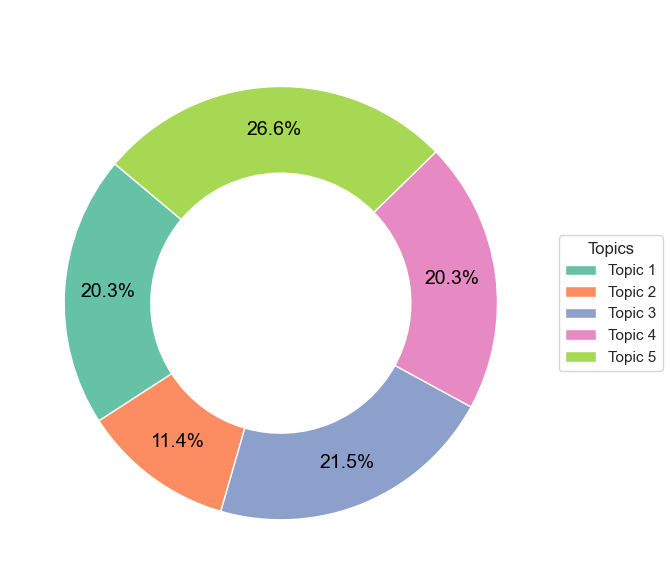

In [2]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Apply global theme and palette
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

# Define keywords for "cheap Apple" narrative
keywords_iphone = [
    "cheap", "budget", "cut", "stripped", "lite", "missing", "removed", 
    "limited", "low-end", "entry-level", "value", "overpriced", "compromise"
]

def contains_keywords(text):
    return any(re.search(rf"\b{k}\b", str(text).lower()) for k in keywords_iphone)

iphone_16e["has_keyword"] = iphone_16e["clean_text_analysis"].apply(contains_keywords)

# Filter and clean the text for topic modeling
topic_comments = iphone_16e[
    (iphone_16e["sentiment_label"] == "negative") &
    (iphone_16e["has_keyword"])
]["clean_text_analysis"].dropna()

# Vectorize the comments
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(topic_comments)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Extract topics
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(f"Topic {idx+1}: " + ", ".join(top_features))
    return topics

# Get feature names and topics
feature_names = vectorizer.get_feature_names_out()
lda_topics = display_topics(lda_model, feature_names)
lda_topics_df = pd.DataFrame({"Topic": [f"Topic {i+1}" for i in range(len(lda_topics))], "Top Words": lda_topics})
display(lda_topics_df.style.set_properties(subset = ['Topic'], **{'Top Words': '400px'}))

# Assign the most probable topic to each comment
topic_assignments = lda_model.transform(doc_term_matrix)
dominant_topic = topic_assignments.argmax(axis=1)

# Add topic column to the original filtered dataframe
topic_comments_df = topic_comments.reset_index(drop=True).to_frame()
topic_comments_df["topic"] = dominant_topic

# Count number of comments per topic
topic_counts = topic_comments_df["topic"].value_counts().sort_index()
topic_labels = [f"Topic {i+1}" for i in topic_counts.index]

fig, ax = plt.subplots(figsize=(12, 6), facecolor='none')
colors = sns.color_palette("Set2", len(topic_counts))

wedges, texts = ax.pie(
    topic_counts.values, startangle=140, colors=colors,
    wedgeprops=dict(width=0.4), labels=None
)

total = sum(topic_counts.values)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    x = np.cos(np.deg2rad(ang)) * 0.8
    y = np.sin(np.deg2rad(ang)) * 0.8
    percentage = f"{100 * topic_counts.values[i]/total:.1f}%"
    ax.text(x, y, percentage, ha='center', va='center', fontsize=14, color='black')

ax.legend(wedges, topic_labels, title="Topics", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Topic Distribution - iPhone 16e", fontsize=14, weight="bold", color="white")
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.show()

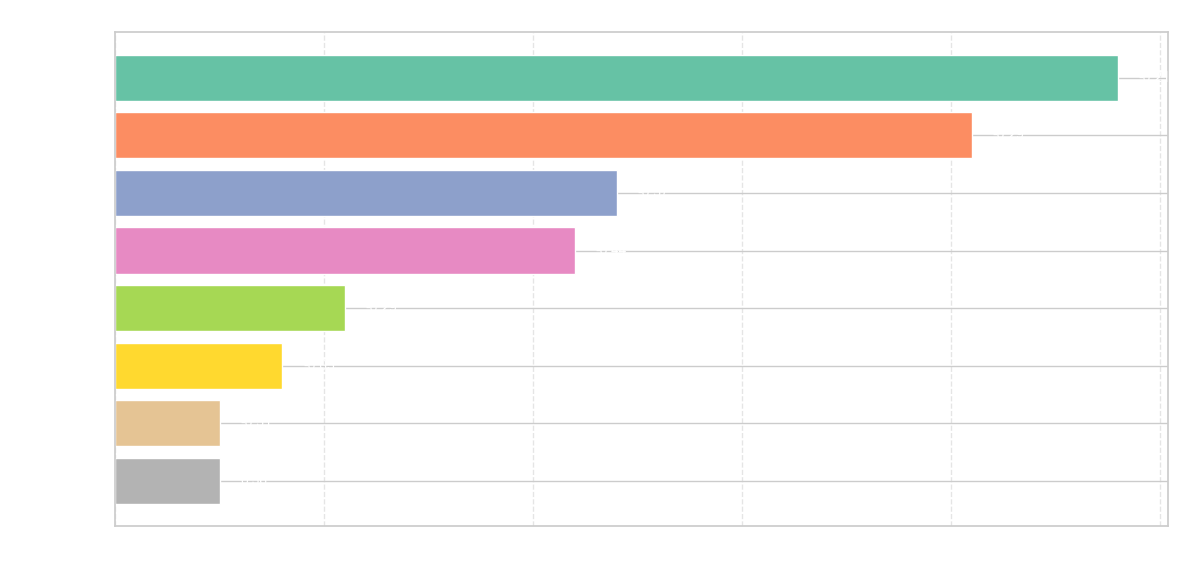

In [17]:
from collections import defaultdict

iphone_16e_clean = iphone_16e.dropna(subset=['clean_text_analysis'])

def get_signed_sentiment(row):
    if row["sentiment_label"] == "positive":
        return row["sentiment_score"]
    elif row["sentiment_label"] == "negative":
        return -row["sentiment_score"]
    else:
        return 0

# Crear diccionarios para contar ocurrencias y acumular sentimiento
keyword_counts = defaultdict(int)
keyword_sentiments = defaultdict(list)

# Iteramos por cada fila para ver si alguna keyword aparece en el texto
for _, row in iphone_16e_clean.iterrows():
    text = row['clean_text_analysis'].lower().split()
    
    # Compute signed sentiment
    if row["sentiment_label"] == "positive":
        signed_sentiment = row["sentiment_score"]
    elif row["sentiment_label"] == "negative":
        signed_sentiment = -row["sentiment_score"]
    else:
        signed_sentiment = 0

    for keyword in keywords_iphone:
        if keyword in text:
            keyword_counts[keyword] += 1
            keyword_sentiments[keyword].append(signed_sentiment)

# Crear DataFrame con los resultados
keyword_df = pd.DataFrame({
    'Keyword': list(keyword_counts.keys()),
    'Mentions': [keyword_counts[k] for k in keyword_counts],
    'Avg Sentiment': [np.mean(keyword_sentiments[k]) for k in keyword_sentiments]
}).sort_values(by="Mentions", ascending=False)

# Keep top 8 most mentioned keywords
keyword_df = keyword_df.head(8).reset_index(drop=True)

# Get Set2 palette colors
palette = sns.color_palette("Set2", n_colors=8)

# Plot manually assigning each bar's color
fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)

bars = ax.barh(
    keyword_df["Keyword"],
    keyword_df["Mentions"],
    color=palette
)

# Invert y-axis so highest mention is on top
ax.invert_yaxis()

# Add sentiment as text next to bars
for i, (bar, sentiment) in enumerate(zip(bars, keyword_df["Avg Sentiment"])):
    ax.text(
        bar.get_width() + 1,     # X position
        bar.get_y() + bar.get_height() / 2,  # Y position (vertically centered)
        f"{sentiment:.2f}",
        va='center',
        fontsize=10,
        color="white"
    )

ax.set_title('Keyword Mentions and Average Sentiment - iPhone 16e Perception', fontsize=14, weight="bold", color="white")
ax.set_xlabel('Number of Mentions', color="white")
ax.set_ylabel('Keyword', color="white")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(linestyle='--', alpha=0.5, axis='x')
ax.set_facecolor('none')  # Transparent background

plt.tight_layout()
plt.show()

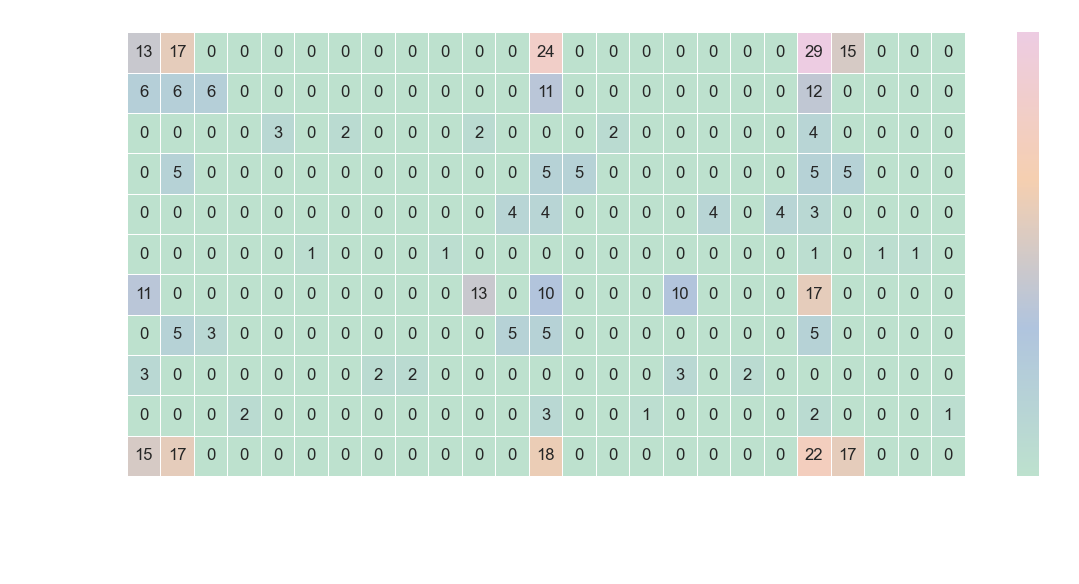

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Usamos solo textos válidos
texts = iphone_16e_clean['clean_text_analysis'].dropna().astype(str).tolist()

# Creamos una matriz de términos con las palabras clave y el resto del vocabulario
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names_out()

# Índices de las palabras clave dentro del vocabulario
keyword_indices = {k: i for k, i in zip(vocab, range(len(vocab))) if k in keywords_iphone}

# Calculamos co-ocurrencias entre keywords y el resto del vocabulario
co_occurrence_matrix = (X.T @ X).toarray()

# Para cada keyword, sacamos las 5 palabras más co-ocurrentes (excluyendo la propia)
co_occurrence_results = {}
for keyword, idx in keyword_indices.items():
    co_row = co_occurrence_matrix[idx]
    co_row[idx] = 0  # eliminar la diagonal
    top_indices = np.argsort(co_row)[-5:][::-1]
    top_words = [(vocab[i], co_row[i]) for i in top_indices if co_row[i] > 0]
    co_occurrence_results[keyword] = top_words

# Convertimos resultados en DataFrame plano para graficar
rows = []
for keyword, pairs in co_occurrence_results.items():
    for word, count in pairs:
        rows.append({'Keyword': keyword, 'Co-Word': word, 'Count': count})

co_df = pd.DataFrame(rows)

# Graficamos como heatmap agrupado
pastel_palette = sns.blend_palette(["#BDE1CE", "#B0C4DE", "#F5CFB0", "#EDCCE2"], as_cmap = True)

heatmap_data = co_df.pivot(index="Keyword", columns="Co-Word", values="Count").fillna(0)
fig = plt.figure(figsize=(12, 6), facecolor='none')  # Transparent figure
ax = fig.add_subplot(111)

sns.heatmap(
    heatmap_data,
    cmap=pastel_palette,
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    ax=ax
)
ax.collections[0].colorbar.ax.yaxis.set_tick_params(color='white')
ax.collections[0].colorbar.ax.yaxis.label.set_color('white')
for label in ax.collections[0].colorbar.ax.get_yticklabels():
    label.set_color("white")
ax.set_title("Co-Occurrence Heatmap: Keywords vs. Associated Words", fontsize=14, weight="bold", color="white")
ax.set_xlabel("Co-occurring Word", color="white")
ax.set_ylabel("Keyword", color="white")
ax.set_facecolor('none')  # Transparent background inside the plot
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.tight_layout()
plt.show()


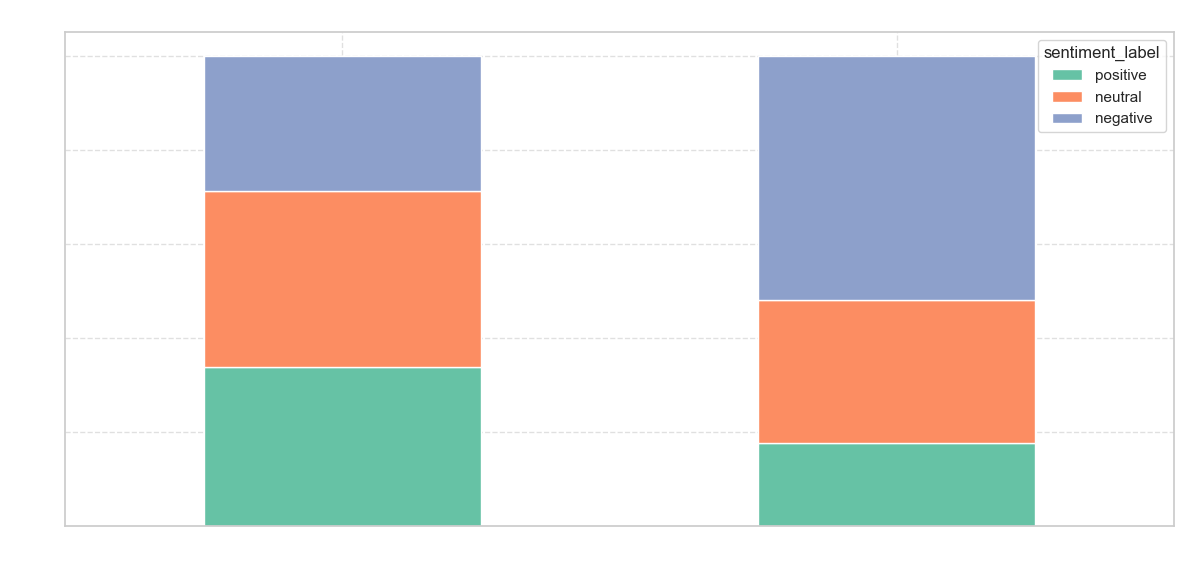

In [18]:
# Boxplot of Sentiment Score by Keyword Presence
sentiment_keyword_table = iphone_16e.groupby("has_keyword")["sentiment_label"].value_counts(normalize=True).unstack().fillna(0)
fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)

sentiment_keyword_table[["positive", "neutral", "negative"]].plot(
    kind="bar", stacked=True, ax=ax, color=sns.color_palette("Set2"))

ax.set_title("Sentiment Distribution by Keyword Presence - iPhone 16e", fontsize=14, weight="bold", color="white")
ax.set_ylabel("Proportion", color="white")
ax.set_xlabel("Keyword Presence", color="white")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No Keyword", "Has Keyword"], rotation=0)  # Set rotation to 0
ax.grid(linestyle="--", alpha=0.6)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('none')
plt.tight_layout()
plt.show()


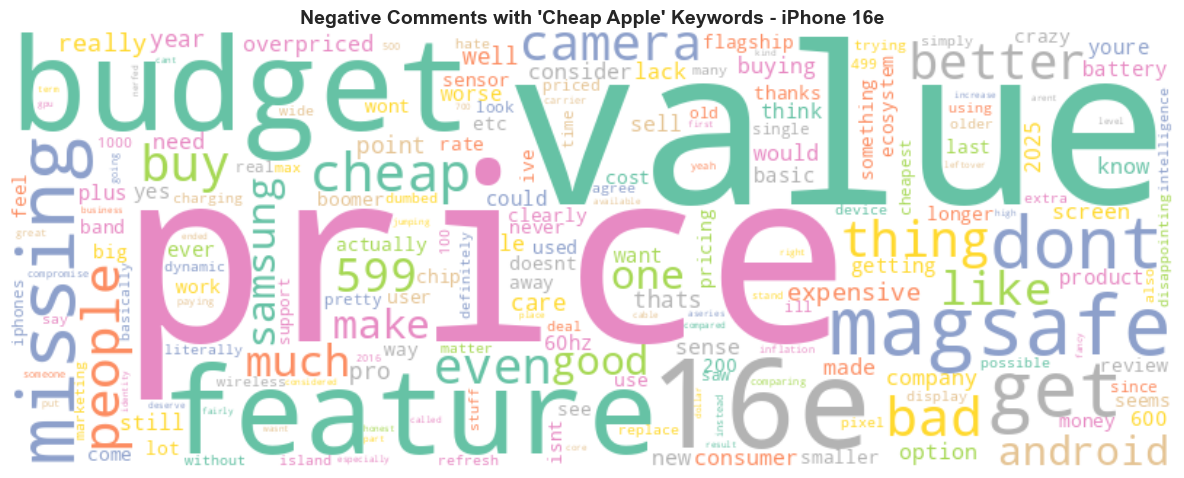

In [119]:
from collections import Counter
from wordcloud import WordCloud

# Convert Set2 palette to a matplotlib colormap
set2_colors = sns.color_palette("Set2", 8).as_hex()

# Create a custom color function
class SimpleGroupedColorFunc(object):
    def __init__(self, colors):
        self.colors = colors
    def __call__(self, word, **kwargs):
        return np.random.choice(self.colors)

color_func = SimpleGroupedColorFunc(set2_colors)

# Filter relevant comments
neg_keyword_comments = iphone_16e[
    (iphone_16e["sentiment_label"] == "negative") &
    (iphone_16e["has_keyword"])
]["clean_text_analysis"].dropna().tolist()

# Generate word frequencies
all_words = " ".join(neg_keyword_comments).split()
word_freq = Counter(all_words)
wordcloud = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(word_freq)

filtered_words = [word for word in all_words if word not in {"iphone", "apple", "phone"}]
filtered_word_freq = Counter(filtered_words)

# Regenerate word cloud
wordcloud_filtered = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(filtered_word_freq)

# Plot the filtered word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_filtered.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.title("Negative Comments with 'Cheap Apple' Keywords - iPhone 16e", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

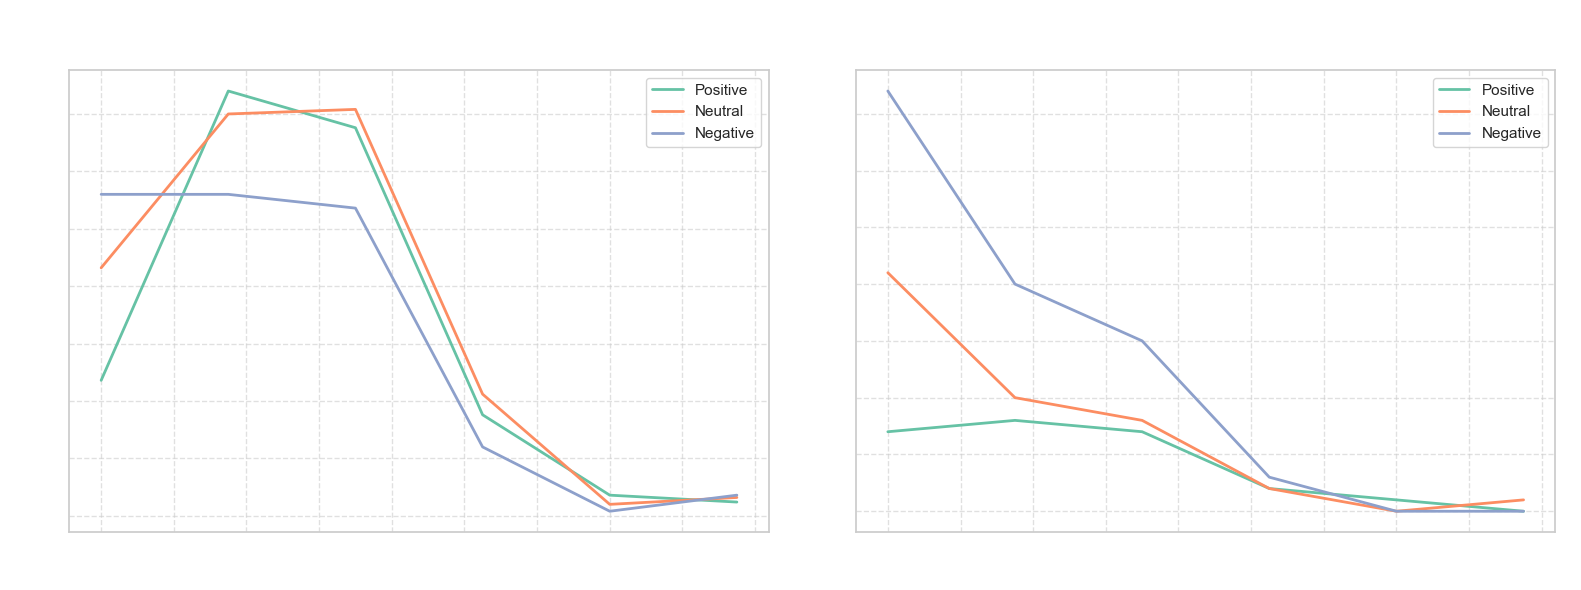

In [57]:
import matplotlib.dates as mdates

iphone_16e["date"] = pd.to_datetime(iphone_16e["date"], errors='coerce')

# Group by week and sentiment label
weekly_sentiment = (
    iphone_16e.groupby([iphone_16e["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convert period to timestamp
weekly_sentiment["week"] = weekly_sentiment["date"].dt.to_timestamp()

# Filtrar solo comentarios que contienen keywords
keyword_df = iphone_16e[iphone_16e["has_keyword"] == True]

# Agrupar por semana y tipo de sentimiento
weekly_keyword_sentiment = (
    keyword_df.groupby([keyword_df["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convertir periodo a fecha
weekly_keyword_sentiment["week"] = weekly_keyword_sentiment["date"].dt.to_timestamp()
date_format = mdates.DateFormatter("%d/%m/%y")

# Create a subplot with 1 row and 2 columns, each with independent y-axis scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False, facecolor='none')
sns.set_palette("Set2")

# === Left plot: All comments ===
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[0].set_title("All Comments", fontsize=13, weight="bold", color="white")
axes[0].set_xlabel("Week", color="white")
axes[0].set_ylabel("Number of Comments", color="white")
axes[0].tick_params(axis='x')
axes[0].xaxis.set_major_formatter(date_format)
axes[0].tick_params(axis='x', colors='white')
axes[0].tick_params(axis='y', colors='white')
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].set_facecolor('none')

# === Right plot: Only comments with keywords ===
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[1].set_title("'Cheap Apple' Comments Only", fontsize=13, weight="bold", color="white")
axes[1].set_xlabel("Week", color="white")
axes[1].set_ylabel("Number of Comments", color="white")
axes[1].tick_params(axis='x')
axes[1].xaxis.set_major_formatter(date_format)
axes[1].tick_params(axis='x', colors='white')
axes[1].tick_params(axis='y', colors='white')
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].set_facecolor('none')

# Global title
fig.suptitle("Weekly Evolution of Comment Sentiment - iPhone 16e", fontsize=14, weight="bold", color="white")
plt.tight_layout()
plt.subplots_adjust(top=0.88) 
plt.show()


### <span style="font-family: Latin Modern Roman; font-size: 23px; font-style: italic"> 4.2 Are the AirPods Pro 2 still the kings of audio… or just an overrated accessory?</span>

,Topic,Top Words
0,Topic 1,"Topic 1: time, year, dont, lol, problem, anc, airpods, pair, sound, iphone"
1,Topic 2,"Topic 2: noise, ear, sound, like, airpods, loud, cancelling, use, tip, thing"
2,Topic 3,"Topic 3: noise, hear, gen, mode, cancellation, issue, work, cancelling, like, airpods"
3,Topic 4,"Topic 4: sound, airpods, pro, quality, good, pair, battery, life, theyre, better"
4,Topic 5,"Topic 5: apple, issue, problem, airpods, ear, pro, work, dont, bud, ive"


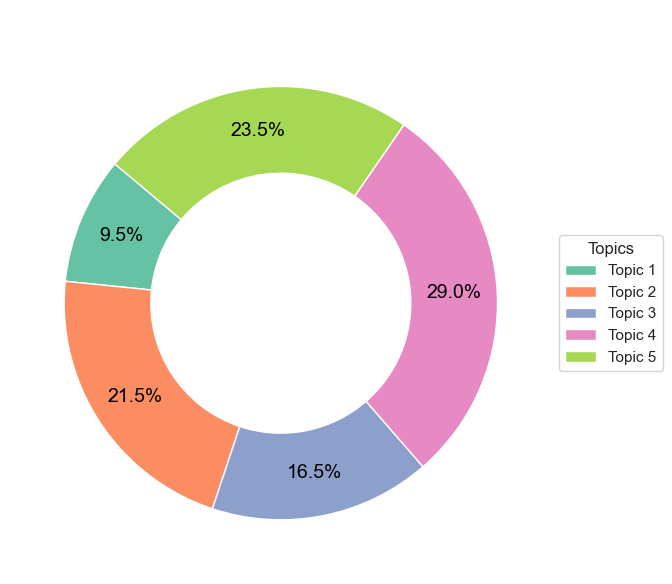

In [25]:
# Define keywords for "Overrated Apple" narrative
keywords_airpods = [
    "overpriced", "expensive", "accessory", "problem", "issue", 
    "work", "pair", "sound", "noise", "battery"
]

def contains_keywords(text):
    return any(re.search(rf"\b{k}\b", str(text).lower()) for k in keywords_airpods)

airpods_pro2["has_keyword"] = airpods_pro2["clean_text_analysis"].apply(contains_keywords)

# Filter and clean the text for topic modeling
topic_comments = airpods_pro2[
    (airpods_pro2["sentiment_label"] == "negative") &
    (airpods_pro2["has_keyword"])
]["clean_text_analysis"].dropna()

# Vectorize the comments
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(topic_comments)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Extract topics
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(f"Topic {idx+1}: " + ", ".join(top_features))
    return topics

# Get feature names and topics
feature_names = vectorizer.get_feature_names_out()
lda_topics = display_topics(lda_model, feature_names)
lda_topics_df = pd.DataFrame({"Topic": [f"Topic {i+1}" for i in range(len(lda_topics))], "Top Words": lda_topics})
display(lda_topics_df.style.set_properties(subset = ['Topic'], **{'Top Words': '400px'}))

# Assign the most probable topic to each comment
topic_assignments = lda_model.transform(doc_term_matrix)
dominant_topic = topic_assignments.argmax(axis=1)

# Add topic column to the original filtered dataframe
topic_comments_df = topic_comments.reset_index(drop=True).to_frame()
topic_comments_df["topic"] = dominant_topic

# Count number of comments per topic
topic_counts = topic_comments_df["topic"].value_counts().sort_index()
topic_labels = [f"Topic {i+1}" for i in topic_counts.index]

fig, ax = plt.subplots(figsize=(12, 6), facecolor='none')
colors = sns.color_palette("Set2", len(topic_counts))

wedges, texts = ax.pie(
    topic_counts.values, startangle=140, colors=colors,
    wedgeprops=dict(width=0.4), labels=None
)

total = sum(topic_counts.values)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    x = np.cos(np.deg2rad(ang)) * 0.8
    y = np.sin(np.deg2rad(ang)) * 0.8
    percentage = f"{100 * topic_counts.values[i]/total:.1f}%"
    ax.text(x, y, percentage, ha='center', va='center', fontsize=14, color='black')

ax.legend(wedges, topic_labels, title="Topics", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Topic Distribution - AirPods Pro 2", fontsize=14, weight="bold", color="white")
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.show()

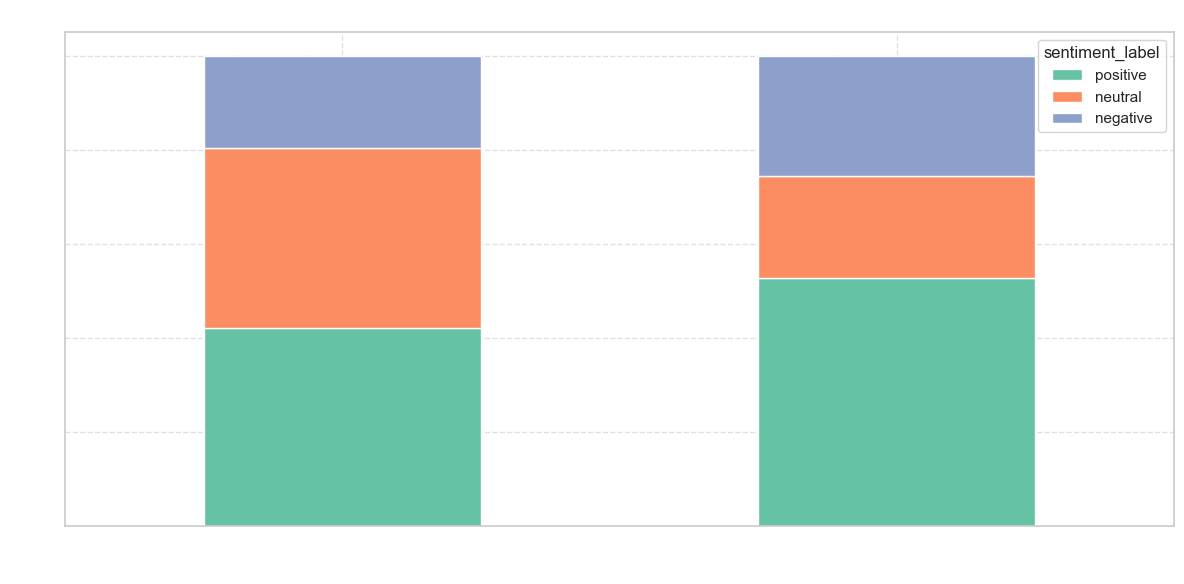

In [26]:
# Boxplot of Sentiment Score by Keyword Presence
sentiment_keyword_table = airpods_pro2.groupby("has_keyword")["sentiment_label"].value_counts(normalize=True).unstack().fillna(0)
fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)

sentiment_keyword_table[["positive", "neutral", "negative"]].plot(
    kind="bar", stacked=True, ax=ax, color=sns.color_palette("Set2"))

ax.set_title("Sentiment Distribution by Keyword Presence - AirPods Pro 2", fontsize=14, weight="bold", color="white")
ax.set_ylabel("Proportion", color="white")
ax.set_xlabel("Keyword Presence", color="white")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No Keyword", "Has Keyword"], rotation=0)  # Set rotation to 0
ax.grid(linestyle="--", alpha=0.6)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('none')
plt.tight_layout()
plt.show()

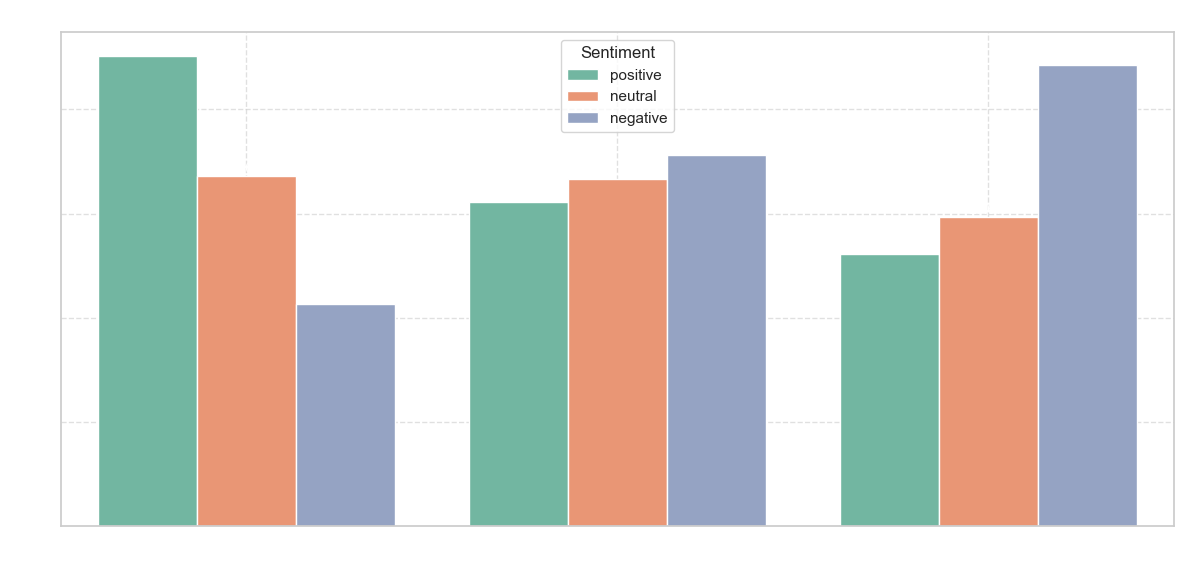

In [30]:
# Add brand labels
airpods_pro2["brand"] = "AirPods Pro 2"
wf_1000xm5["brand"] = "Sony WF-1000XM5"
BoseQC2["brand"] = "Bose QC2"

palette = sns.color_palette("Set2", 8)  # Using Set2 palette

# Assign specific colors to sentiments
sentiment_colors = {
    "positive": palette[0],  # First color for positive
    "neutral": palette[1],   # Second color for neutral
    "negative": palette[2]   # Third color for negative
}

# Concatenate all
all_airpods_brands = pd.concat([airpods_pro2, wf_1000xm5, BoseQC2], ignore_index=True)

# Standardize sentiment labels
all_airpods_brands["sentiment_label"] = all_airpods_brands["sentiment_label"].str.lower().str.strip()

# Sentiment distribution per brand
sentiment_dist = all_airpods_brands.groupby(["brand", "sentiment_label"]).size().reset_index(name="count")
sentiment_dist["percentage"] = sentiment_dist.groupby("brand")["count"].transform(lambda x: x / x.sum() * 100)

fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)
sns.barplot(data=sentiment_dist, x="brand", y="percentage", hue="sentiment_label", hue_order=["positive", "neutral", "negative"], ax=ax, palette=sentiment_colors, order=["AirPods Pro 2", "Sony WF-1000XM5", "Bose QC2"],
)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.1f}%' for v in container], label_type='edge', fontsize=10, color='white')
ax.set_title("Sentiment Distribution by Brand", fontsize=14, weight="bold", color="white")
ax.set_ylabel("Percentage", color="white")
ax.set_xlabel("Brand", color="white")
ax.legend(title="Sentiment")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(linestyle="--", alpha=0.6)
ax.set_facecolor('none')
plt.tight_layout()
plt.show()

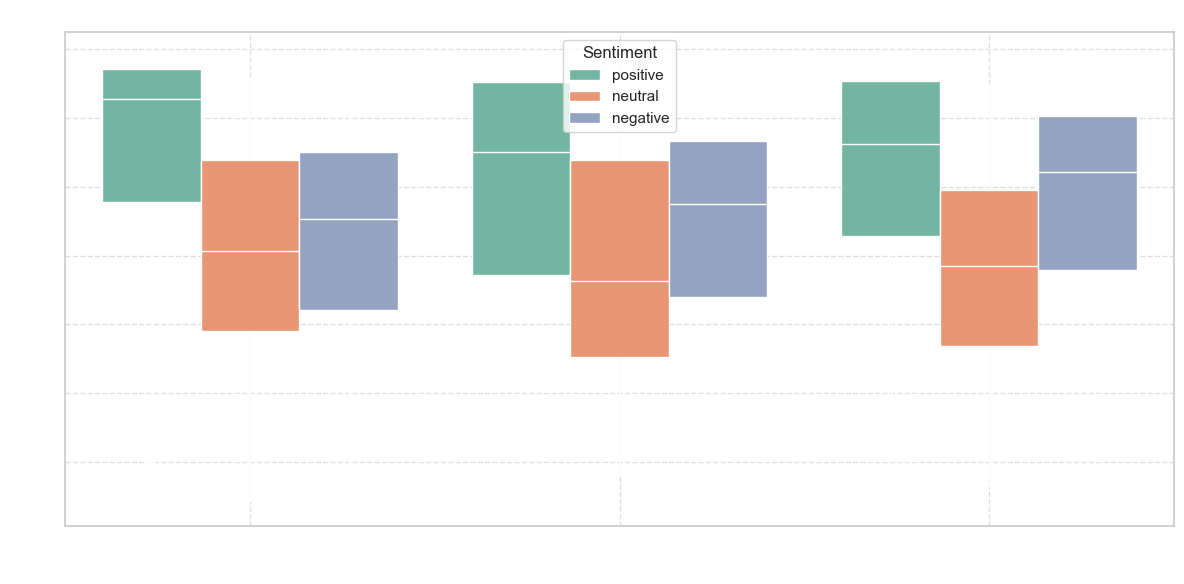

In [74]:
# Average sentiment score per brand
fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)
sns.boxplot(data=all_airpods_brands,x="brand", y="sentiment_score", hue="sentiment_label", palette="Set2", ax=ax)
for artist in ax.artists:
    artist.set_edgecolor("white")
for line in ax.lines:
    line.set_color("white")
    if line.get_marker() != 'None':
        line.set_markeredgecolor("white")
for patch in ax.patches:
    patch.set_edgecolor("white")
ax.set_title("Sentiment Score Distribution by Brand", fontsize=14, weight="bold", color="white")
ax.set_ylabel("Sentiment Score (0-1)", color="white")
ax.set_xlabel("Brand", color="white")
ax.grid(linestyle="--", alpha=0.6)
ax.legend(title="Sentiment", loc='upper center')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('none')
plt.tight_layout()
plt.show()

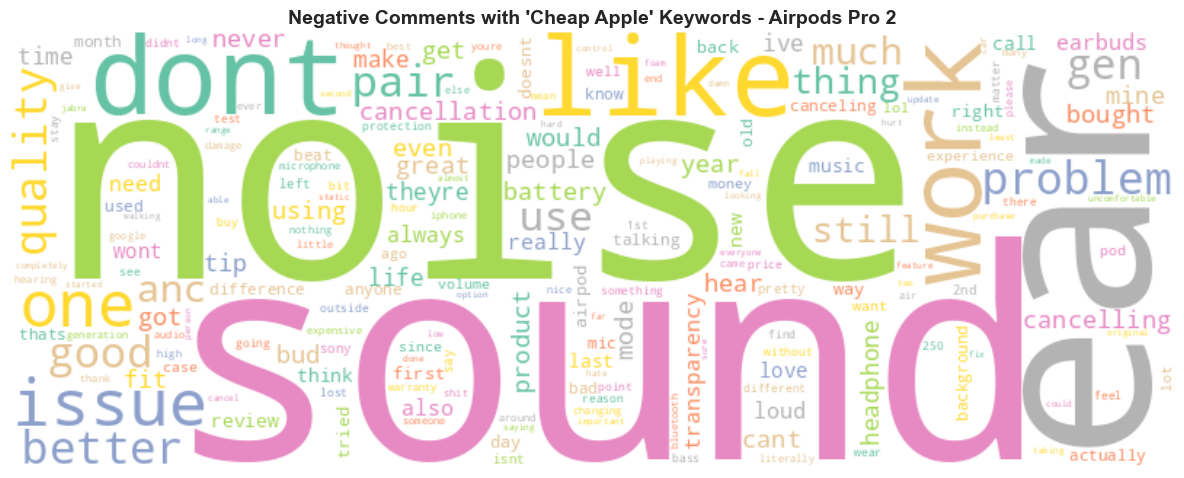

In [179]:
from collections import Counter
from wordcloud import WordCloud

# Convert Set2 palette to a matplotlib colormap
set2_colors = sns.color_palette("Set2", 8).as_hex()

# Create a custom color function
class SimpleGroupedColorFunc(object):
    def __init__(self, colors):
        self.colors = colors
    def __call__(self, word, **kwargs):
        return np.random.choice(self.colors)

color_func = SimpleGroupedColorFunc(set2_colors)

# Filter relevant comments
neg_keyword_comments = airpods_pro2[
    (airpods_pro2["sentiment_label"] == "negative") &
    (airpods_pro2["has_keyword"])
]["clean_text_analysis"].dropna().tolist()

# Generate word frequencies
all_words = " ".join(neg_keyword_comments).split()
word_freq = Counter(all_words)
wordcloud = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(word_freq)

filtered_words = [word for word in all_words if word not in {"airpods", "apple", "phone", "pro"}]
filtered_word_freq = Counter(filtered_words)

# Regenerate word cloud
wordcloud_filtered = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(filtered_word_freq)

# Plot the filtered word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_filtered.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.title("Negative Comments with 'Cheap Apple' Keywords - Airpods Pro 2", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

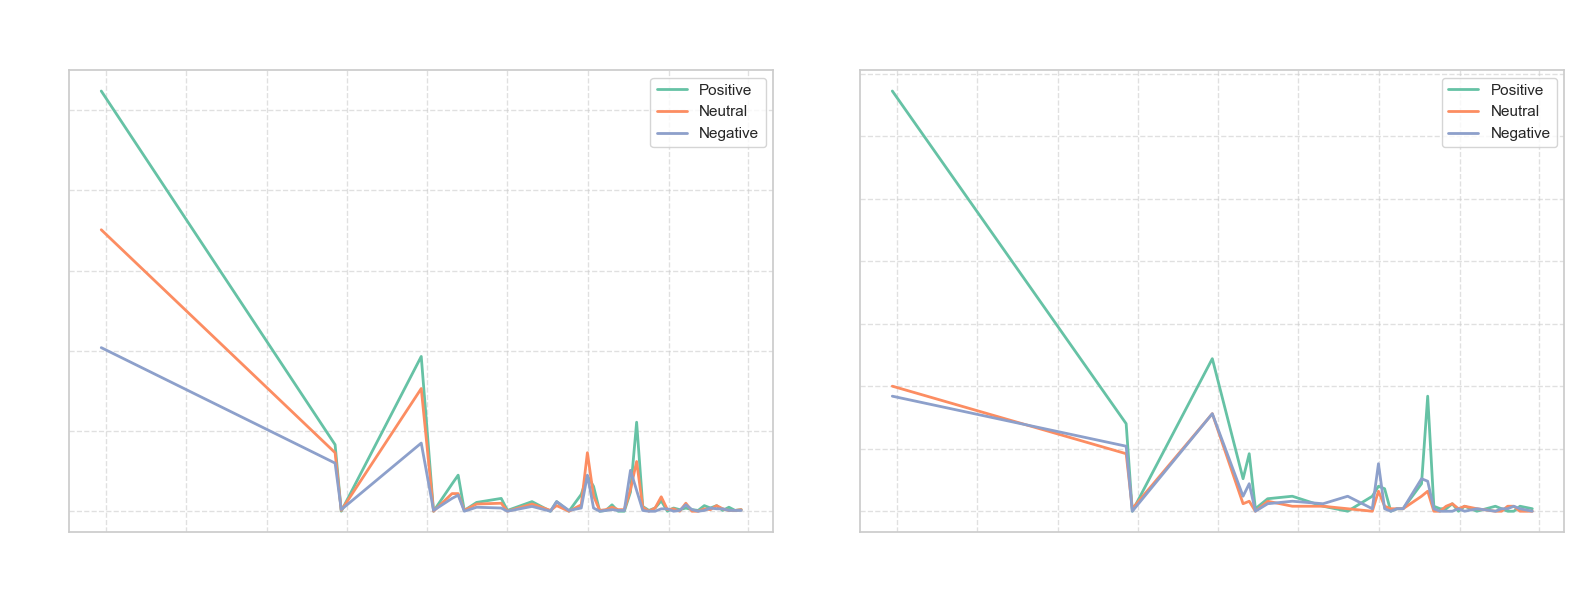

In [56]:
airpods_pro2["date"] = pd.to_datetime(airpods_pro2["date"], errors='coerce')

# Group by week and sentiment label
weekly_sentiment = (
    airpods_pro2.groupby([airpods_pro2["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convert period to timestamp
weekly_sentiment["week"] = weekly_sentiment["date"].dt.to_timestamp()

# Filtrar solo comentarios que contienen keywords
keyword_df = airpods_pro2[airpods_pro2["has_keyword"] == True]

# Agrupar por semana y tipo de sentimiento
weekly_keyword_sentiment = (
    keyword_df.groupby([keyword_df["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convertir periodo a fecha
weekly_keyword_sentiment["week"] = weekly_keyword_sentiment["date"].dt.to_timestamp()

# Create a subplot with 1 row and 2 columns, each with independent y-axis scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False, facecolor='none')
sns.set_palette("Set2")

# === Left plot: All comments ===
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[0].set_title("All Comments", fontsize=13, weight="bold", color="white")
axes[0].set_xlabel("Week", color="white")
axes[0].set_ylabel("Number of Comments", color="white")
axes[0].tick_params(axis='x')
axes[0].xaxis.set_major_formatter(date_format)
axes[0].tick_params(axis='x', colors='white')
axes[0].tick_params(axis='y', colors='white')
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].set_facecolor('none')

# === Right plot: Only comments with keywords ===
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[1].set_title("'Overrated Apple' Comments Only", fontsize=13, weight="bold", color="white")
axes[1].set_xlabel("Week", color="white")
axes[1].set_ylabel("Number of Comments", color="white")
axes[1].tick_params(axis='x')
axes[1].xaxis.set_major_formatter(date_format)
axes[1].tick_params(axis='x', colors='white')
axes[1].tick_params(axis='y', colors='white')
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].set_facecolor('none')

# Global title
fig.suptitle("Weekly Evolution of Comment Sentiment - Airpods Pro 2", fontsize=14, weight="bold", color="white")
plt.tight_layout()
plt.subplots_adjust(top=0.88) 
plt.show()

### <span style="font-family: Latin Modern Roman; font-size: 23px; font-style: italic"> 4.3 Apple Vision Pro: Innovation Breakthrough, Billionaire Toy, or Both?</span>

,Topic,Top Words
0,Topic 1,"Topic 1: people, time, want, price, make, use, isnt, way, great, expensive"
1,Topic 2,"Topic 2: think, apple, like, really, video, tracking, look, product, use, hand"
2,Topic 3,"Topic 3: thing, eye, work, expensive, apple, dont, use, want, potential, lot"
3,Topic 4,"Topic 4: vision, pro, apple, expensive, device, doesnt, thats, use, mac, productivity"
4,Topic 5,"Topic 5: expensive, like, product, developer, apple, year, market, time, point, feel"


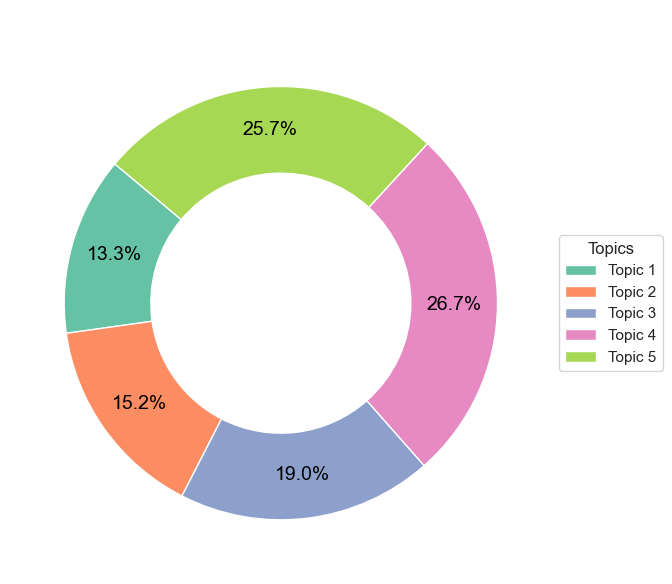

In [43]:
# Define keywords for "stagnant Apple" narrative
keywords_visionpro = [
    "spatial computing", "augmented reality", "mixed reality", "gesture control", 
    "eye tracking", "productivity", "immersion", "expensive", "status symbol", 
    "toy", "unnecessary", "early adopter", "overhyped", "potential"
]

def contains_keywords(text):
    return any(re.search(rf"\b{k}\b", str(text).lower()) for k in keywords_visionpro)

vision_pro["has_keyword"] = vision_pro["clean_text_analysis"].apply(contains_keywords)

# Filter and clean the text for topic modeling
topic_comments = vision_pro[
    (vision_pro["sentiment_label"] == "negative") &
    (vision_pro["has_keyword"])
]["clean_text_analysis"].dropna()

# Vectorize the comments
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(topic_comments)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Extract topics
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(f"Topic {idx+1}: " + ", ".join(top_features))
    return topics

# Get feature names and topics
feature_names = vectorizer.get_feature_names_out()
lda_topics = display_topics(lda_model, feature_names)
lda_topics_df = pd.DataFrame({"Topic": [f"Topic {i+1}" for i in range(len(lda_topics))], "Top Words": lda_topics})
display(lda_topics_df.style.set_properties(subset = ['Topic'], **{'Top Words': '400px'}))

# Assign the most probable topic to each comment
topic_assignments = lda_model.transform(doc_term_matrix)
dominant_topic = topic_assignments.argmax(axis=1)

# Add topic column to the original filtered dataframe
topic_comments_df = topic_comments.reset_index(drop=True).to_frame()
topic_comments_df["topic"] = dominant_topic

# Count number of comments per topic
topic_counts = topic_comments_df["topic"].value_counts().sort_index()
topic_labels = [f"Topic {i+1}" for i in topic_counts.index]

fig, ax = plt.subplots(figsize=(12, 6), facecolor='none')
colors = sns.color_palette("Set2", len(topic_counts))

wedges, texts = ax.pie(
    topic_counts.values, startangle=140, colors=colors,
    wedgeprops=dict(width=0.4), labels=None
)

total = sum(topic_counts.values)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    x = np.cos(np.deg2rad(ang)) * 0.8
    y = np.sin(np.deg2rad(ang)) * 0.8
    percentage = f"{100 * topic_counts.values[i]/total:.1f}%"
    ax.text(x, y, percentage, ha='center', va='center', fontsize=14, color='black')

ax.legend(wedges, topic_labels, title="Topics", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Topic Distribution - Apple Vision Pro", fontsize=14, weight="bold", color="white") 
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.show()

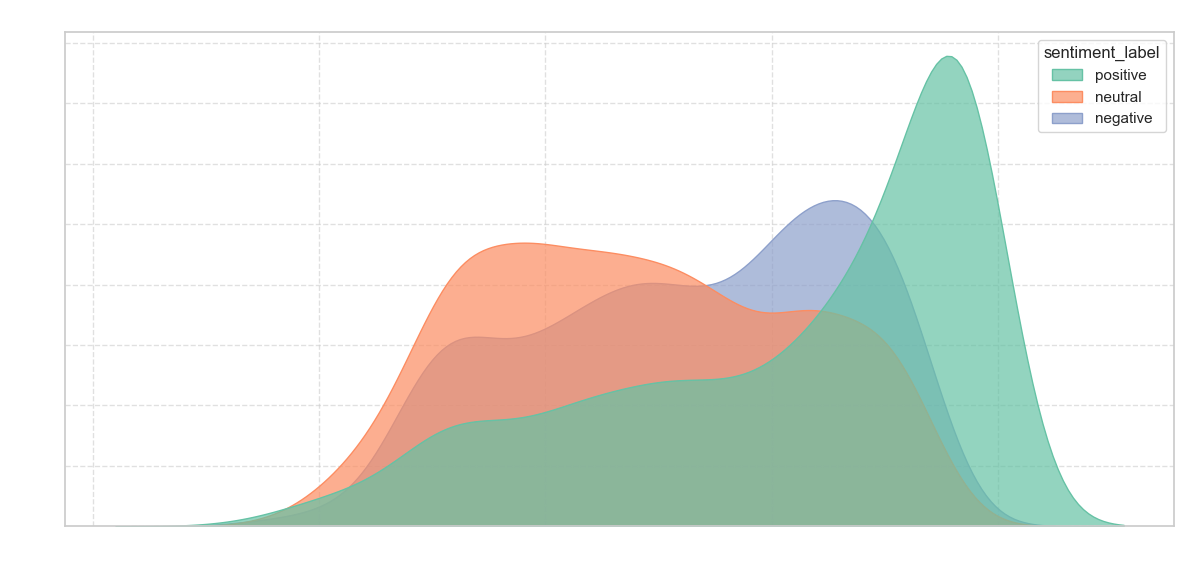

In [49]:
# Sentiment Distribution
fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)
sns.kdeplot(data=vision_pro, x="sentiment_score", hue="sentiment_label", palette="Set2", fill=True, common_norm=False, alpha=0.7, ax=ax)
ax.set_title("Sentiment Score Distribution by Class - Apple Vision Pro", fontsize=14, weight="bold", color="white")
ax.set_xlabel("Sentiment Score", fontsize=12, color="white")
ax.set_ylabel("Density", fontsize=12, color="white")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(linestyle="--", alpha=0.6)
ax.set_facecolor('none')
plt.tight_layout()
plt.show()

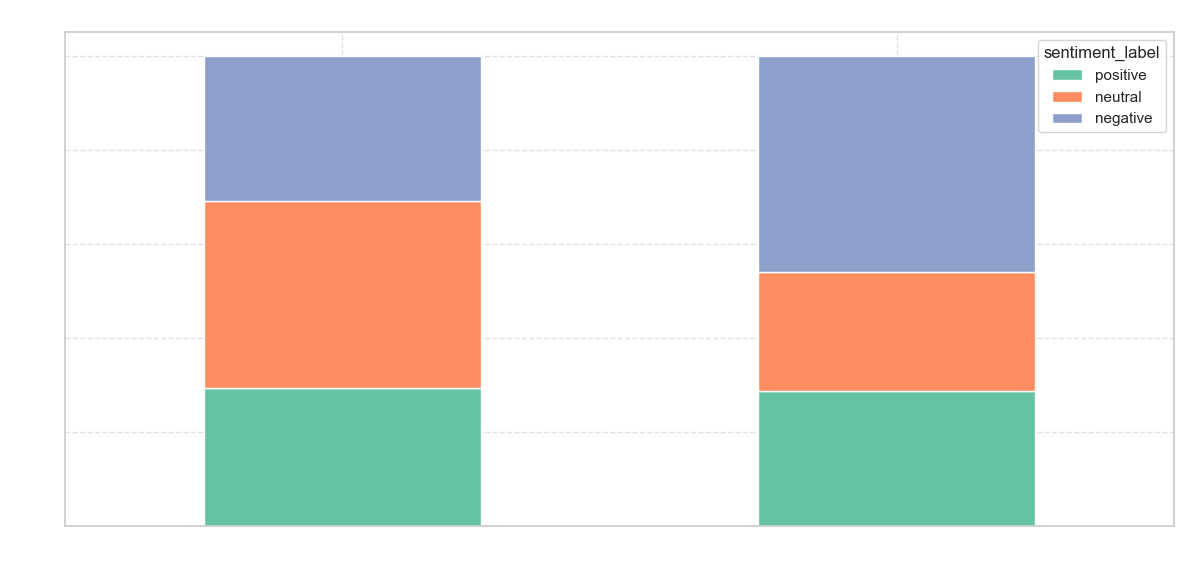

In [50]:
# Boxplot of Sentiment Score by Keyword Presence
sentiment_keyword_table = vision_pro.groupby("has_keyword")["sentiment_label"].value_counts(normalize=True).unstack().fillna(0)
fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)

sentiment_keyword_table[["positive", "neutral", "negative"]].plot(
    kind="bar", stacked=True, ax=ax, color=sns.color_palette("Set2"))

ax.set_title("Sentiment Distribution by Keyword Presence - Apple Vision Pro", fontsize=14, weight="bold", color="white")
ax.set_ylabel("Proportion", color="white")
ax.set_xlabel("Keyword Presence", color="white")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No Keyword", "Has Keyword"], rotation=0)  # Set rotation to 0
ax.grid(linestyle="--", alpha=0.6)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('none')
plt.tight_layout()
plt.show()


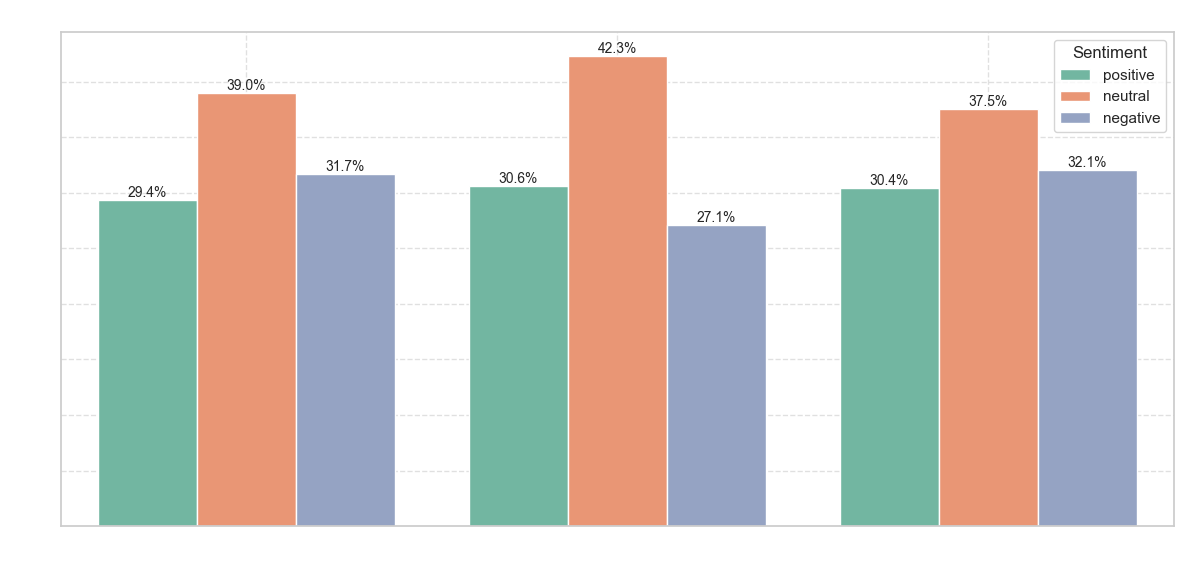

In [51]:
# Add brand labels
vision_pro["brand"] = "Apple Vision Pro"
metaquest_3["brand"] = "Meta Quest 3"
HTC_Vive["brand"] = "HTC Vive XR Elite"

palette = sns.color_palette("Set2", 8)  # Using Set2 palette

# Assign specific colors to sentiments
sentiment_colors = {
    "positive": palette[0],  # First color for positive
    "neutral": palette[1],   # Second color for neutral
    "negative": palette[2]   # Third color for negative
}

# Concatenate all
all_ar_glasses = pd.concat([vision_pro, metaquest_3, HTC_Vive], ignore_index=True)

# Standardize sentiment labels
all_ar_glasses["sentiment_label"] = all_ar_glasses["sentiment_label"].str.lower().str.strip()

# Sentiment distribution per brand
sentiment_dist = all_ar_glasses.groupby(["brand", "sentiment_label"]).size().reset_index(name="count")
sentiment_dist["percentage"] = sentiment_dist.groupby("brand")["count"].transform(lambda x: x / x.sum() * 100)

fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)
sns.barplot(data=sentiment_dist, x="brand", y="percentage", hue="sentiment_label", hue_order=["positive", "neutral", "negative"], ax=ax, palette=sentiment_colors, order=["Apple Vision Pro", "Meta Quest 3", "HTC Vive XR Elite"],
)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.1f}%' for v in container], label_type='edge', fontsize=10)
ax.set_title("Sentiment Distribution by Brand", fontsize=14, weight="bold", color="white")
ax.set_ylabel("Percentage", color="white")
ax.set_xlabel("Brand", color="white")
ax.legend(title="Sentiment")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(linestyle="--", alpha=0.6)
ax.set_facecolor('none')
plt.tight_layout()
plt.show()

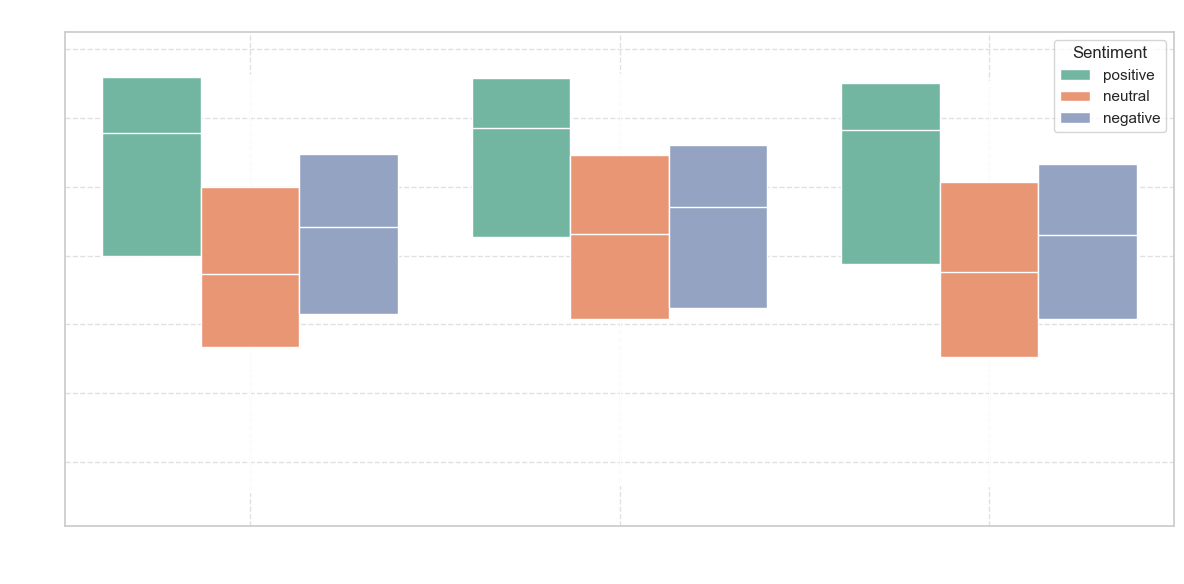

In [76]:
# Average sentiment score per brand
fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)
sns.boxplot(data=all_ar_glasses,x="brand", y="sentiment_score", hue="sentiment_label", palette="Set2", ax=ax)
for artist in ax.artists:
    artist.set_edgecolor("white")
for line in ax.lines:
    line.set_color("white")
    if line.get_marker() != 'None':
        line.set_markeredgecolor("white")
for patch in ax.patches:
    patch.set_edgecolor("white")
ax.set_title("Sentiment Score Distribution by Brand", fontsize=14, weight="bold", color="white")
ax.set_ylabel("Sentiment Score (0-1)", color="white")
ax.set_xlabel("Brand", color="white")
ax.grid(linestyle="--", alpha=0.6)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.legend(title="Sentiment", loc='upper right')
ax.set_facecolor('none')
plt.tight_layout()
plt.show()

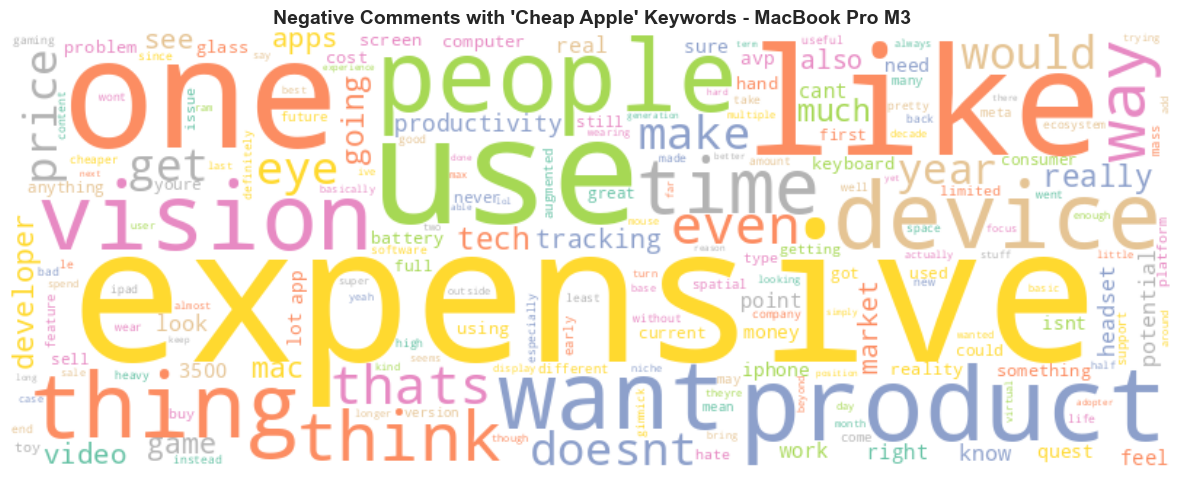

In [171]:
from collections import Counter
from wordcloud import WordCloud

# Convert Set2 palette to a matplotlib colormap
set2_colors = sns.color_palette("Set2", 8).as_hex()

# Create a custom color function
class SimpleGroupedColorFunc(object):
    def __init__(self, colors):
        self.colors = colors
    def __call__(self, word, **kwargs):
        return np.random.choice(self.colors)

color_func = SimpleGroupedColorFunc(set2_colors)

# Filter relevant comments
neg_keyword_comments = vision_pro[
    (vision_pro["sentiment_label"] == "negative") &
    (vision_pro["has_keyword"])
]["clean_text_analysis"].dropna().tolist()

# Generate word frequencies
all_words = " ".join(neg_keyword_comments).split()
word_freq = Counter(all_words)
wordcloud = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(word_freq)

filtered_words = [word for word in all_words if word not in {"macbook", "apple", "pro", "dont"}]
filtered_word_freq = Counter(filtered_words)

# Regenerate word cloud
wordcloud_filtered = WordCloud(width=800, height=300, background_color="white").generate_from_frequencies(filtered_word_freq)

# Plot the filtered word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_filtered.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.title("Negative Comments with 'Cheap Apple' Keywords - MacBook Pro M3", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

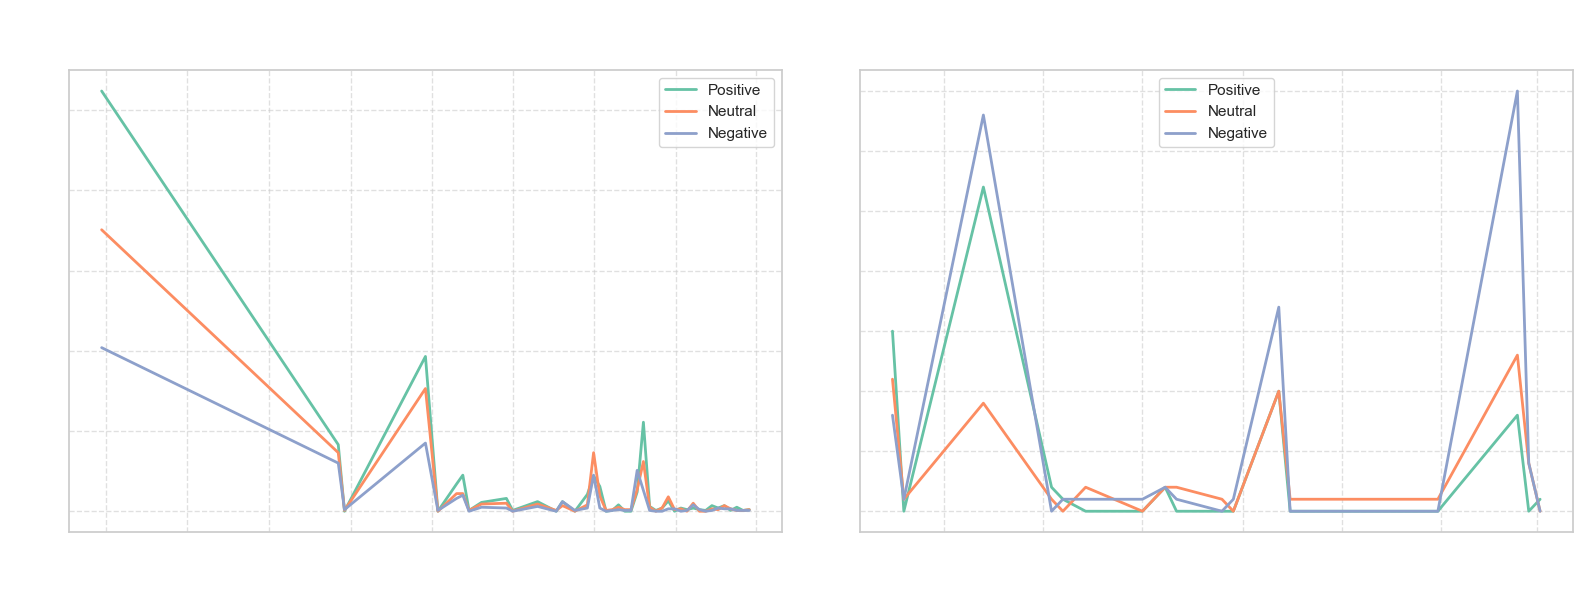

In [55]:
vision_pro["date"] = pd.to_datetime(vision_pro["date"], errors='coerce')

# Group by week and sentiment label
vision_proweekly_sentiment = (
    vision_pro.groupby([vision_pro["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convert period to timestamp
weekly_sentiment["week"] = weekly_sentiment["date"].dt.to_timestamp()

# Filtrar solo comentarios que contienen keywords
keyword_df = vision_pro[vision_pro["has_keyword"] == True]

# Agrupar por semana y tipo de sentimiento
weekly_keyword_sentiment = (
    keyword_df.groupby([keyword_df["date"].dt.to_period("W"), "sentiment_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Convertir periodo a fecha
weekly_keyword_sentiment["week"] = weekly_keyword_sentiment["date"].dt.to_timestamp()

# Create a subplot with 1 row and 2 columns, each with independent y-axis scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False, facecolor='none')
sns.set_palette("Set2")

# === Left plot: All comments ===
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[0], data=weekly_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[0].set_title("All Comments", fontsize=13, weight="bold", color="white")
axes[0].set_xlabel("Week", color="white")
axes[0].set_ylabel("Number of Comments", color="white")
axes[0].tick_params(axis='x')
axes[0].xaxis.set_major_formatter(date_format)
axes[0].tick_params(axis='x', colors='white')
axes[0].tick_params(axis='y', colors='white')
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].set_facecolor('none')

# === Right plot: Only comments with keywords ===
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="positive", label="Positive", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="neutral", label="Neutral", linewidth=2)
sns.lineplot(ax=axes[1], data=weekly_keyword_sentiment, x="week", y="negative", label="Negative", linewidth=2)
axes[1].set_title("'Overrated Apple' Comments Only", fontsize=13, weight="bold", color="white")
axes[1].set_xlabel("Week", color="white")
axes[1].set_ylabel("Number of Comments", color="white")
axes[1].tick_params(axis='x')
axes[1].xaxis.set_major_formatter(date_format)
axes[1].tick_params(axis='x', colors='white')
axes[1].tick_params(axis='y', colors='white')
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].set_facecolor('none')

# Global title
fig.suptitle("Weekly Evolution of Comment Sentiment - Apple Vision Pro", fontsize=14, weight="bold", color="white")
plt.tight_layout()
plt.subplots_adjust(top=0.88) 
plt.show()

In [61]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
candidate_labels = ["innovation", "price", "luxury"]

def get_relevance_scores(text):
    result = classifier(text, candidate_labels)
    scores = dict(zip(result["labels"], result["scores"]))
    return pd.Series({
        "innovation_score": scores.get("innovation", 0),
        "price_score": scores.get("price", 0),
        "luxury_score": scores.get("luxury", 0)
    })

vision_pro_clean = vision_pro.dropna(subset=["clean_text_sentiment"]).copy()
vision_pro_clean["clean_text_sentiment"] = vision_pro_clean["clean_text_sentiment"].astype(str)
scores_vision_pro = vision_pro_clean["clean_text_sentiment"].apply(get_relevance_scores)
vision_pro_clean = pd.concat([vision_pro_clean.reset_index(drop=True), scores_vision_pro.reset_index(drop=True)], axis=1)

Device set to use mps:0


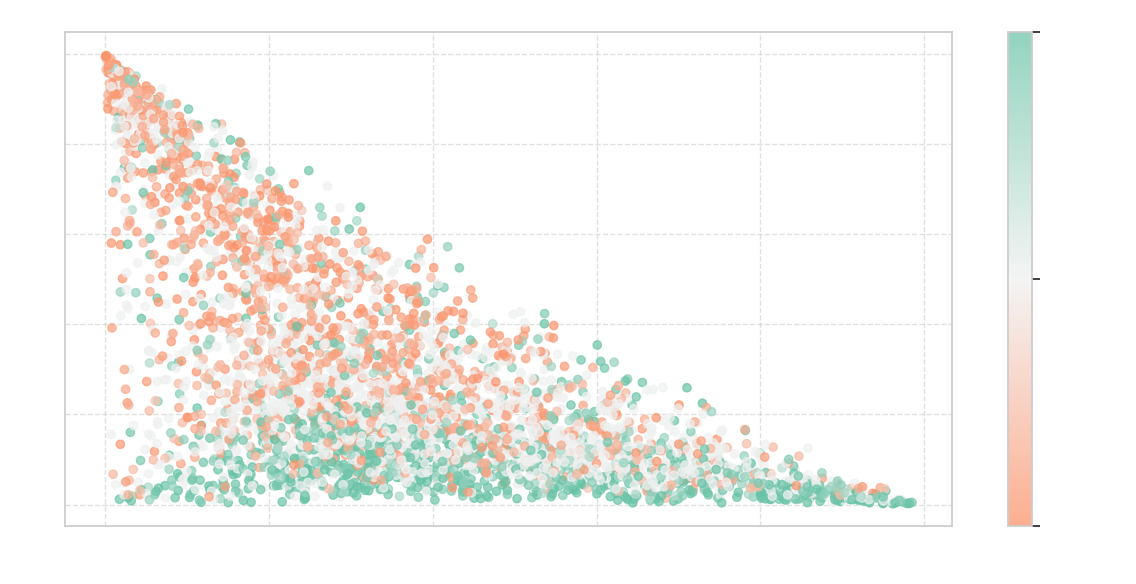

In [70]:
import matplotlib.colors as mcolors

def get_signed_sentiment(row):
    if row["sentiment_label"] == "positive":
        return row["sentiment_score"]
    elif row["sentiment_label"] == "negative":
        return -row["sentiment_score"]
    else:
        return 0  # neutral

# Apply
vision_pro_clean["signed_sentiment"] = vision_pro_clean.apply(get_signed_sentiment, axis=1)

x = vision_pro_clean["innovation_score"]
y = vision_pro_clean["price_score"]
color = vision_pro_clean["signed_sentiment"]

colors = [(0.0, "#fc8d62"),(0.5, "#f0f0f0"),(1.0, "#66c2a5")]

cmap = mcolors.LinearSegmentedColormap.from_list("signed_gradient", colors)
norm = plt.Normalize(vmin=-1, vmax=1)

fig = plt.figure(figsize=(12, 6), facecolor='none')
ax = fig.add_subplot(111)
scatter = ax.scatter(x, y, c=color, cmap=cmap, norm=norm, alpha=0.7)
ax.set_title("Apple Vision Pro: Innovation vs Price Perception", fontsize=14, weight="bold", color="white")
ax.set_xlabel("Innovation Score", color="white")
ax.set_ylabel("Price Sensitivity Score", color="white")
ax.grid(linestyle="--", alpha=0.6)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('none')

# Colorbar
cbar = plt.colorbar(scatter, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['Negative', 'Neutral', 'Positive'])
cbar.set_label("Sentiment Score", color="white")
cbar.ax.tick_params(labelcolor='white')
plt.tight_layout()
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 25px;"> Elena Conderana Medem y Sergio Cuenca Núñez </span>